In [ ]:
1. sourcing
2. Cleansing - format to analyze
3. Univariate Analysis
4. Bivariate Analysis
5. Derived Metrics


# Data sourcing

1. Private data
2. public data

Public data isn’t always relevant and private data isn’t always easily available.

# Public data set

https://github.com/awesomedata/awesome-public-datasets
    
https://data.gov.in/

https://github.com/datameet

In [ ]:
# Agricultural data 

In [2]:
import pandas as pd

In [11]:
total_literate = 763638812
total_population = 1210854977 - 164515253


literacy_rate = total_literate/total_population
literacy_rate

0.7298191920695921

## Data cleansing

- Fix rows and columns
- Fix missing values
- Standardise values
- Fix invalid values
- Filter data

### Fix Rows and columns

- Delete incorrect rows - Unnecessary header rows,footer rows
- DElete summary rows
- DElete extra rows - Column number indicator rows, blank rows

`Columns`
- Add column names if missing -> Missing header row
- Rename Column Consistently ->  Abbreviations, encoded columns
- Delete uncessary columns -> Unidentified, irrelevant columns
- Split column for more data -> 
- Merge column for identifiers -> firstname, lastname -> state,district
- Align misaligned columns -> Shifted columns

`Refer the excel - Data cleansing checklist`

## Missing Values

- Set values as missing values: Identify values that indicate missing data, and yet are not recognised by the software as such, e.g treat blank strings, "NA", "XX", "999", etc. as missing.

- Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to keep missing values as such rather than exaggerating the existing rows/columns.

- Delete rows, columns: Rows could be deleted if the number of missing values are significant in number, as this would not impact the analysis. Columns could be removed if the missing values are quite significant in number.

- Fill partial missing values using business judgement: Missing time zone, century, etc. These values are easily identifiable.

In [143]:
import pandas as pd
import numpy as np
marks = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GZVBQG5pzJeNaL1ve50Rv9YNV/class-grades.csv')
marks.head()
marks.dtypes
print(marks.isnull().sum())

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64


Q. Remove all the rows in the dataset 'marks' having 5 missing values and then print the number of missing values in each column.

In [37]:
## alternate way 

# marks[marks.isnull().sum(axis=1)==5]

marks = marks[marks.isnull().sum(axis=1)==5] #  # system solution 
print(marks.isnull().sum())

Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
73       7         NaN       NaN      NaN       NaN    NaN
90       8         NaN       NaN      NaN       NaN    NaN

# Standardising Values

- Standardise units: Ensure all observations under a variable have a common and consistent unit, e.g. convert lbs to kgs, miles/hr to km/hr, etc.

- Scale values if required:  Make sure the observations under a variable have a common scale

- Standardise precision for better presentation of data, e.g. 4.5312341 kgs to 4.53 kgs.

- Remove outliers: Remove high and low values that would disproportionately affect the results of your analysis.

# Standardise Text

- Remove extra characters like common prefix/suffix, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.

- Standardise case: There are various cases that string variables may take, e.g. UPPERCASE, lowercase, Title Case, Sentence case, etc.

- Standardise format: E.g. 23/10/16 to 2016/10/23, “Modi, Narendra" to “Narendra Modi", etc.

In [ ]:
## Q.

In [47]:
import pandas as pd
customer = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/9B2ZPE1apMvqrLWx7p8ge9dqX/cust_dimen.csv')
# customer.head()

customer['Cust_id'] = customer['Cust_id'].str.replace('Cust_','')
# customer['Cust_id'] = customer['Cust_id'].map(lambdax:x.strip('Cust_')) # system solution 
print(customer.head(10))
# customer.dtypes


Customer_Name       object
Province            object
Region              object
Customer_Segment    object
Cust_id             object
dtype: object

# Invalid Values

- Encode unicode properly: In case the data is being read as junk characters, try to change encoding, E.g. CP1252 instead of UTF-8.
- Convert incorrect data types: Correct the incorrect data types to the correct data types for ease of analysis. E.g. if numeric values are stored as strings, it would not be possible to calculate metrics such as mean, median, etc. Some of the common data type corrections are — string to number: "12,300" to “12300”; string to date: "2013-Aug" to “2013/08”; number to string: “PIN Code 110001” to "110001"; etc.
- Correct values that go beyond range: If some of the values are beyond logical range, e.g. temperature less than -273° C (0 K), you would need to correct them as required. A close look would help you check if there is scope for correction, or if the value needs to be removed.
- Correct values not in the list: Remove values that don’t belong to a list. E.g. In a data set containing blood groups of individuals, strings “E” or “F” are invalid values and can be removed.
- Correct wrong structure: Values that don’t follow a defined structure can be removed. E.g. In a data set containing pin codes of Indian cities, a pin code of 12 digits would be an invalid value and needs to be removed. Similarly, a phone number of 12 digits would be an invalid value.
- Validate internal rules: If there are internal rules such as a date of a product’s delivery must definitely be after the date of the order, they should be correct and consistent.

# Filtering Data

- Deduplicate data: Remove identical rows, remove rows where some columns are identical
- Filter rows: Filter by segment, filter by date period to get only the rows relevant to the analysis
- Filter columns: Pick columns relevant to the analysis
- Aggregate data: Group by required keys, aggregate the rest

In [ ]:
# Q.

In [56]:
import pandas as pd
rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/JPAqXRWexo7nybkQ7BjPLWVN/rating_final.csv')


rating_update = rating.drop_duplicates(keep='first')

print(rating.shape)
print(rating_update.shape)

(1254, 5)
(1149, 5)


# Univariate Analysis

- Dimentions
- Measures

- Ordered ones have some kind of ordering. Some examples are
    - Salary = High-Medium-low
    - Month = Jan-Feb-Mar etc.
- Unordered ones do not have the notion of high-low, more-less etc. Example:
    - Type of loan taken by a person = home, personal, auto etc.
    - Organisation of a person = Sales, marketing, HR etc.

## Unordered Categorical Variables - Univariate Analysis

In [ ]:
Analyzing single column - 
- we can get the frequecy of the column value appearance
- we can get the rank as per the frequency
- plot a rank-frequency 

In [82]:
df = pd.read_csv('tendulkar_ODI.csv')
df.head()

Unnamed: 0 Runs Mins  BF 4s 6s      SR Pos Dismissal Inns     Opposition  \
0           1    0    -   2  0  0       0   5    caught    2     v Pakistan   
1           2    0    2   2  0  0       0   5    caught    2  v New Zealand   
2           3   36   51  39  5  0    92.3   6    caught    1  v New Zealand   
3           4   19   38  35  1  1   54.28   4    bowled    2      v England   
4           5   31   31  26  3  0  119.23   6    bowled    2      v England   

       Ground Start Date  
0  Gujranwala  18-Dec-89  
1     Dunedin   1-Mar-90  
2  Wellington   6-Mar-90  
3       Leeds  18-Jul-90  
4  Nottingham  20-Jul-90

In [90]:
df.Runs.value_counts()

1      16
2      14
0      12
4       9
21      8
       ..
81      1
89      1
102     1
86      1
85      1
Name: Runs, Length: 106, dtype: int64

In [84]:
df['Runs'] = df.Runs.apply(lambda x: x.strip('*'))


In [93]:

df.Runs = df.Runs[~((df.Runs == 'TDNB'))]


In [97]:
df = df.dropna()
df.Runs = df.Runs.astype("int")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_101424\2722265627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Runs = df.Runs.astype("int")


(array([84., 38., 31., 35., 14.]),
 array([ 0., 10., 20., 30., 40., 50.]),
 <BarContainer object of 5 artists>)

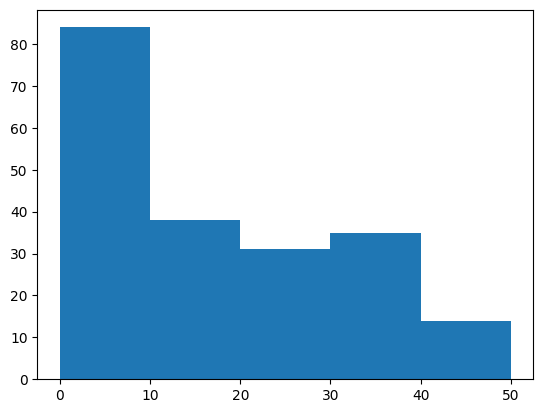

In [101]:
import matplotlib.pyplot  as plt
bins=[0,10,20,30,40,50]
plt.hist(df.Runs,bins)

## Plot a histogram of the number of 4s hit by Tendulkar. What is the most common value of the variable X, where X represents the number of 4s hit by him?

In [108]:
df = df[~ (df['4s'] == '-')]

In [105]:
df['4s'] = df['4s'].astype("int")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_101424\3567961362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4s'] = df['4s'].astype("int")


(array([135.,  42.,  43.,  28.,  20.,  11.,   9.,   2.,   1.,   1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

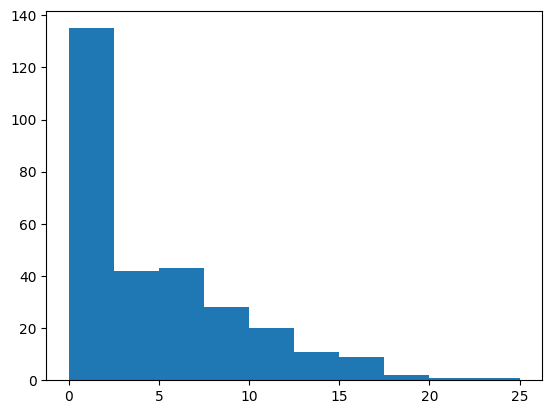

In [106]:
plt.hist(df['4s'])

## Quantitative Variables - Summary Metrics

In [372]:
df = pd.read_csv('popularity.csv')
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

## removing spaces from column header name

In [373]:
print(df.columns)
# d = {}
# for col in df.columns:
#     d[col] = col.strip()
    
# df.rename(columns = d, inplace=True)
# print(df.columns)



## Alternate way
df.columns = df.columns.str.strip() ## solution provided in discussion forum
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

## Mode
The mode of a categorical variable is the value (category) that occurs the most often.

What is the mode of the num_keywords variable in the News Popularity data set?

In [132]:
df[' num_keywords'].mode()

0    7.0
Name:  num_keywords, dtype: float64

            Mean
What is the average number of times the articles in the data set were shared, i.e what is the mean of the shares?      

In [135]:
df[' shares'].mean()

3395.3801836343455

Median
What is the median value of the shares?

In [136]:
df[' shares'].median()

1400.0

<AxesSubplot: >

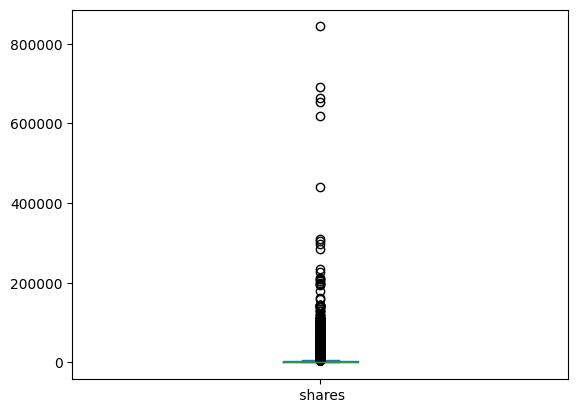

In [138]:
df[' shares'].plot.box()

In [113]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

# Draded Questions

In [159]:
df = pd.read_csv('popularity.csv')

In [140]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

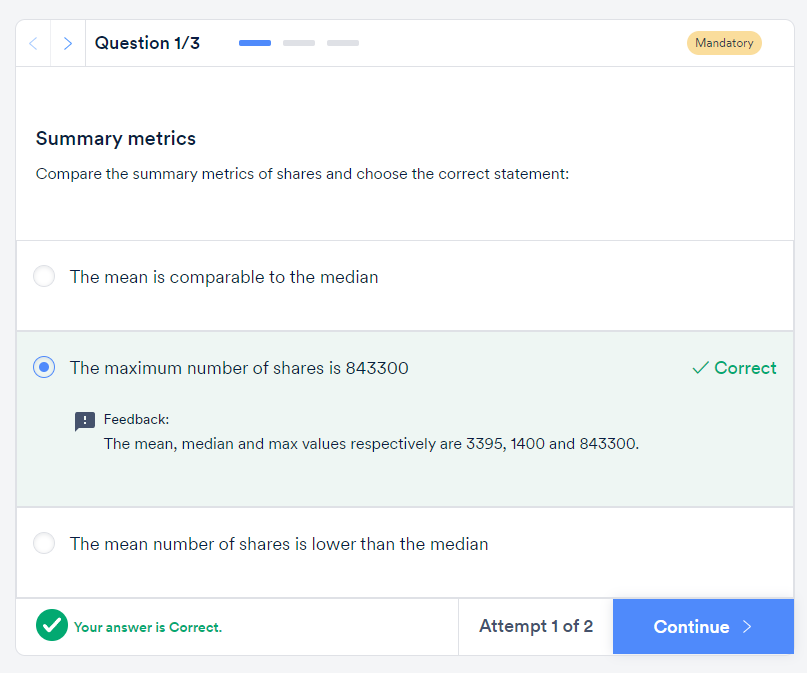

In [141]:
df[' shares'].quantile([0.78])

0.78    3100.0
Name:  shares, dtype: float64

In [144]:
np.percentile(df[' shares'], 78)

3100.0

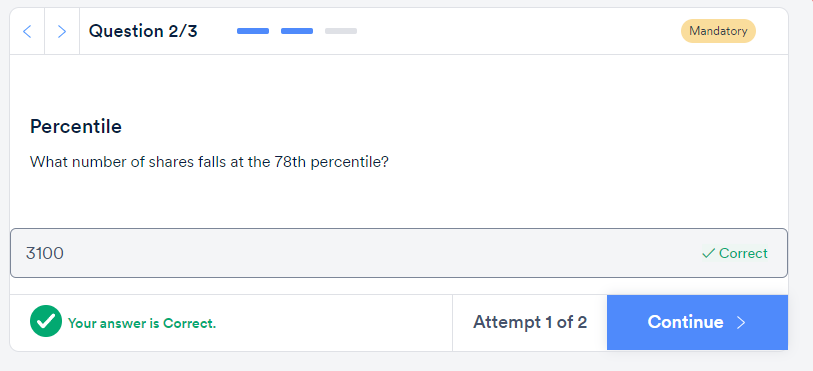

In [145]:
df[' shares'].quantile([0.30,0.40,0.50,0.60,0.70,0.80,0.90])

0.3    1000.0
0.4    1200.0
0.5    1400.0
0.6    1800.0
0.7    2300.0
0.8    3400.0
0.9    6200.0
Name:  shares, dtype: float64

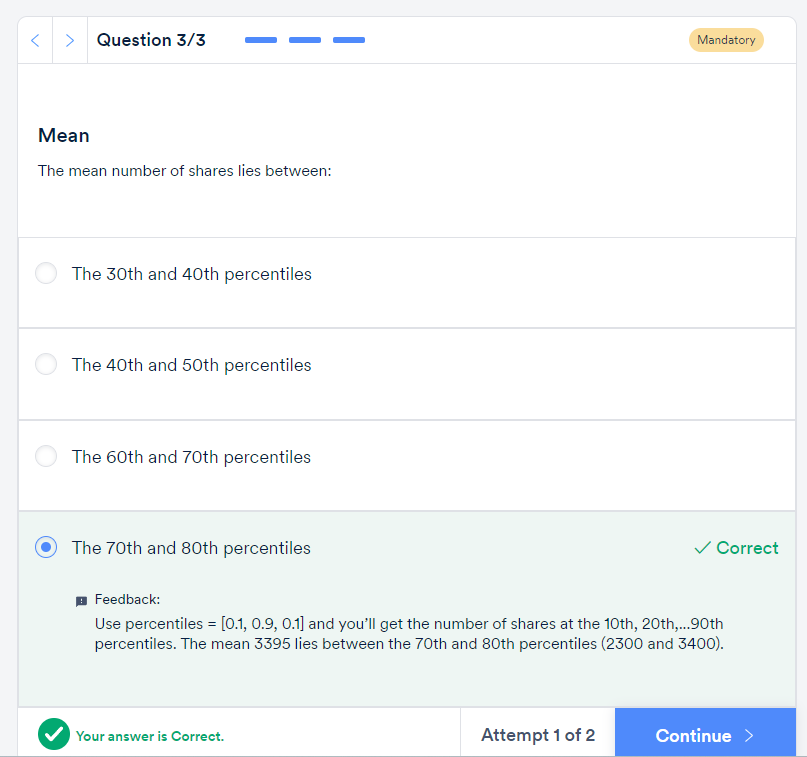

### How to remove the outliers data

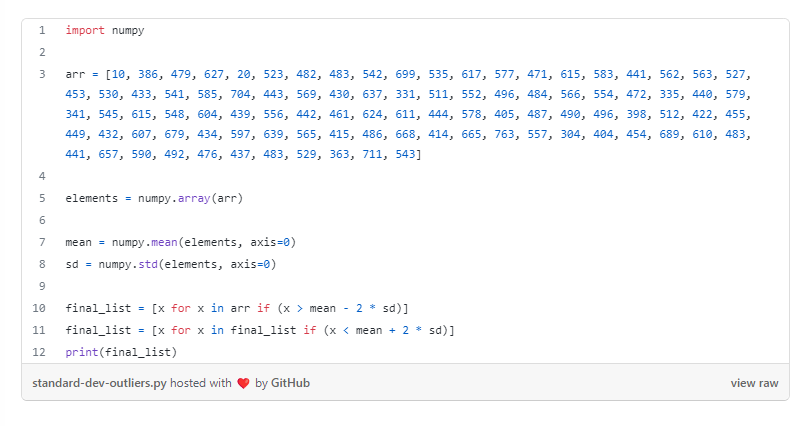

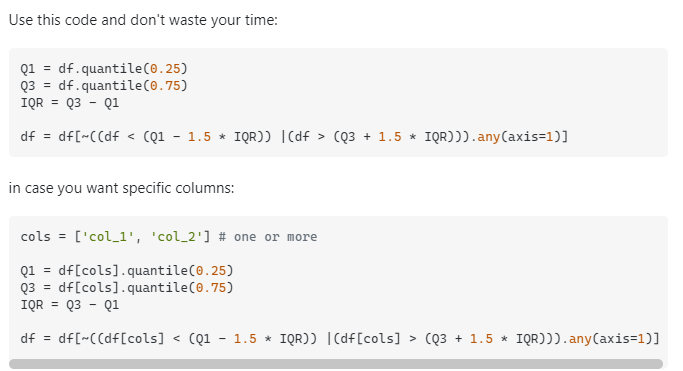

In [169]:
df = pd.read_csv('popularity.csv')
print(df.shape)

Q1 = df[' shares'].quantile(0.5)
print(Q1)
Q3 = df[' shares'].quantile(0.95)
print(Q3)



df = df[~ (df[' shares'] > Q3) ]

print(df.shape)

df[' shares'].describe()


(39644, 61)
1400.0
10800.0
(37663, 61)


count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [172]:
((39644-37663)/39644)* 100

4.996973060236101

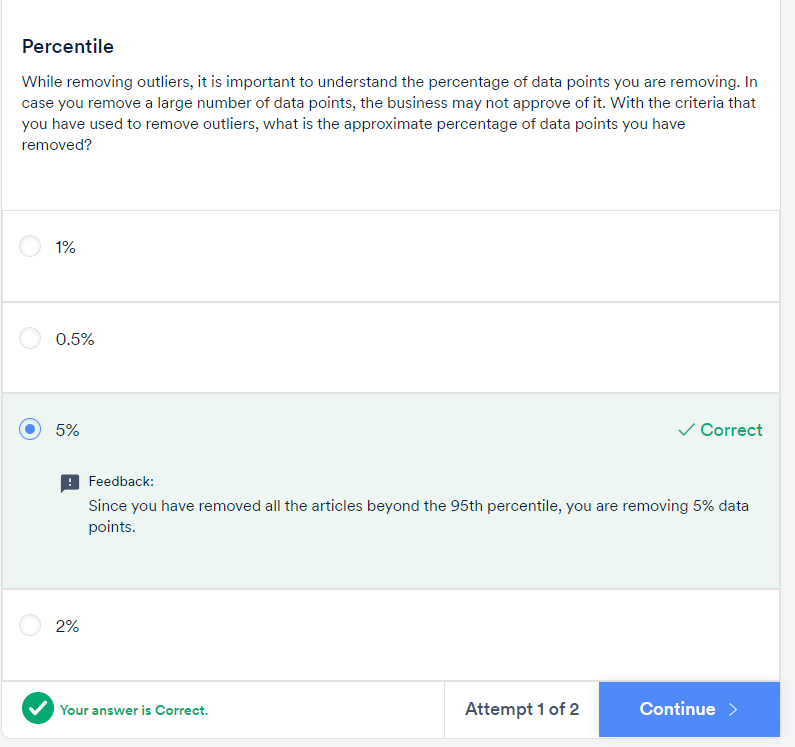

## Segmented Univariate Analysis

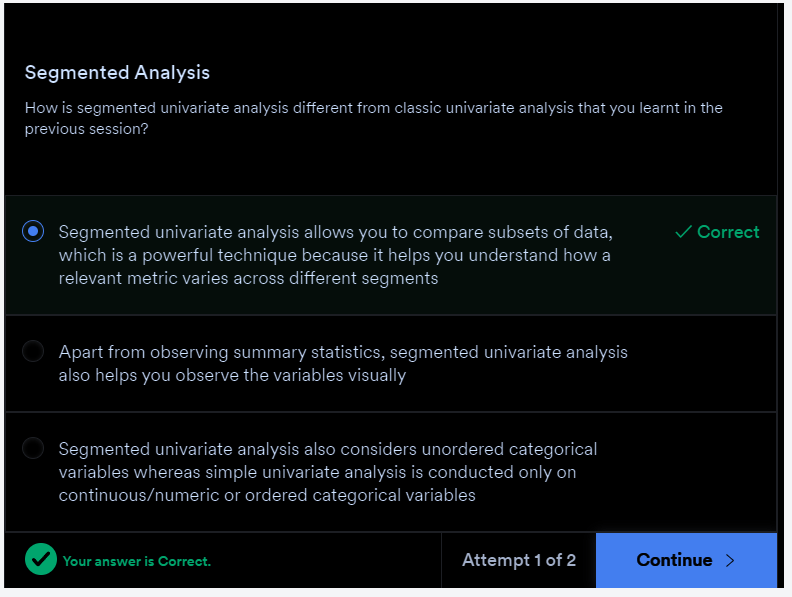

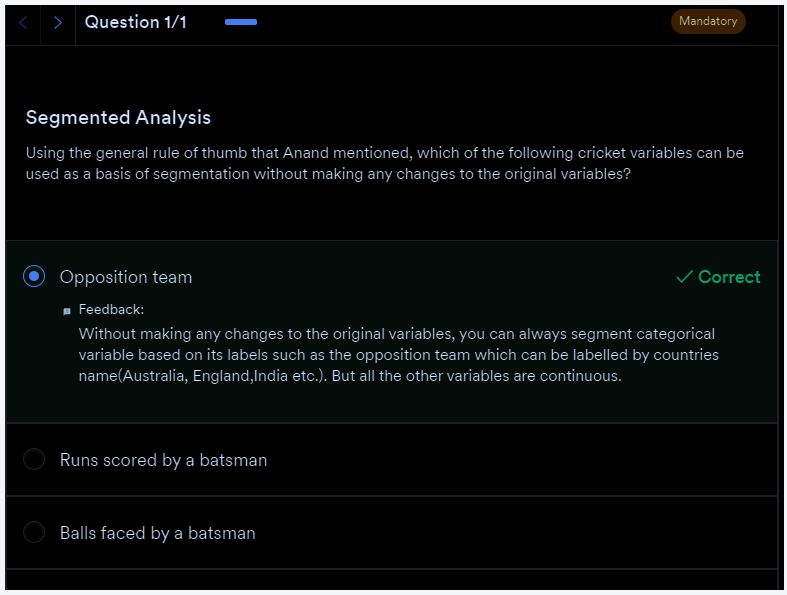

## Basis of segmentation

- Take raw data
- Group by dimensions
- Summarise using a relevant metric such as mean, median, etc.
- Compare the aggregated metric across groups/categories

In [366]:
data = pd.read_csv('EDA_nas.csv')


In [178]:
data.groupby(by=(['Watch.TV'])).mean()['Science..']

Watch.TV
Every day       36.357915
Never           35.638589
Once a month    36.786127
Once a week     36.467112
Name: Science.., dtype: float64

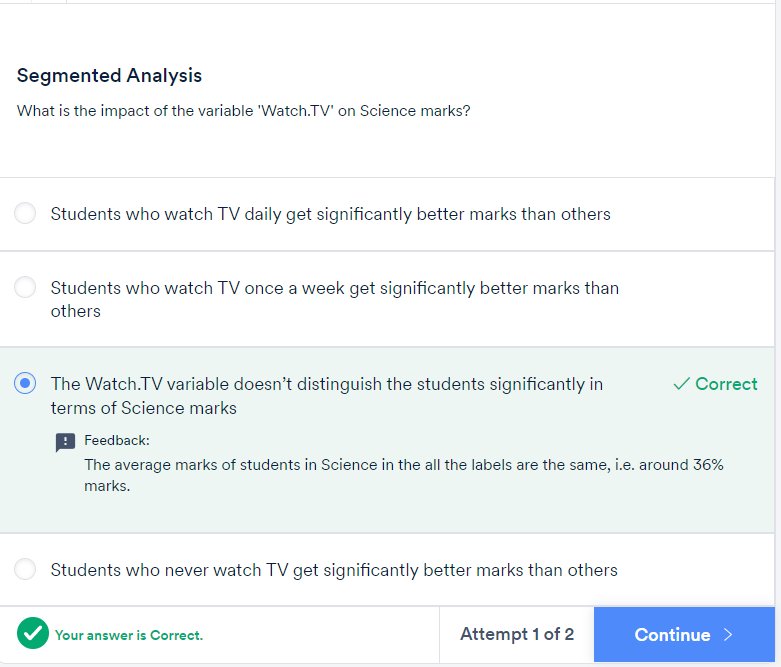

In [179]:
data.groupby(by=(['Father.edu'])).mean()['Maths..']

Father.edu
Degree & above    34.879193
Illiterate        29.126754
Primary           32.561137
Secondary         32.230393
Sr secondary      32.493415
Name: Maths.., dtype: float64

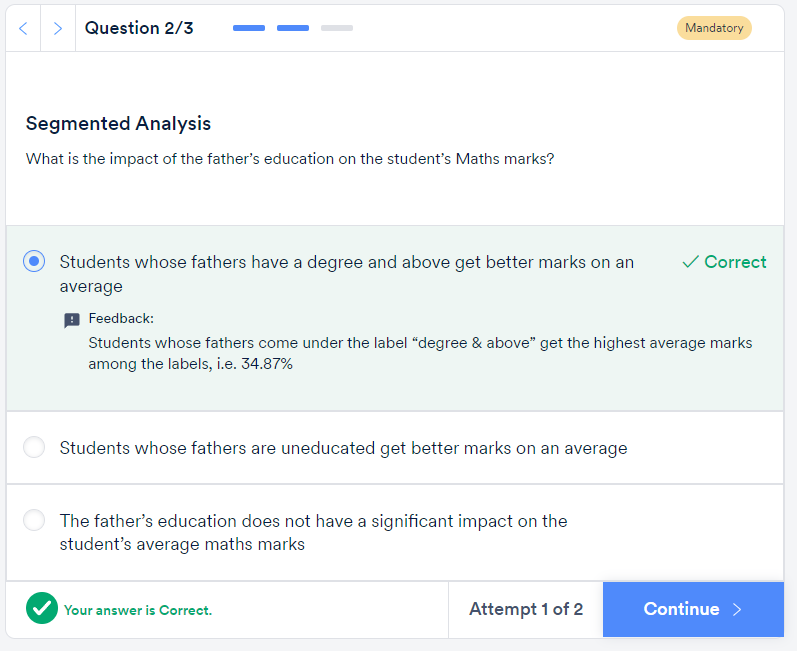

In [180]:
data.groupby(by=(['Play.games'])).mean()['Reading..']

Play.games
Every day       54.780136
Never           49.107484
Once a month    51.951193
Once a week     59.627034
Name: Reading.., dtype: float64

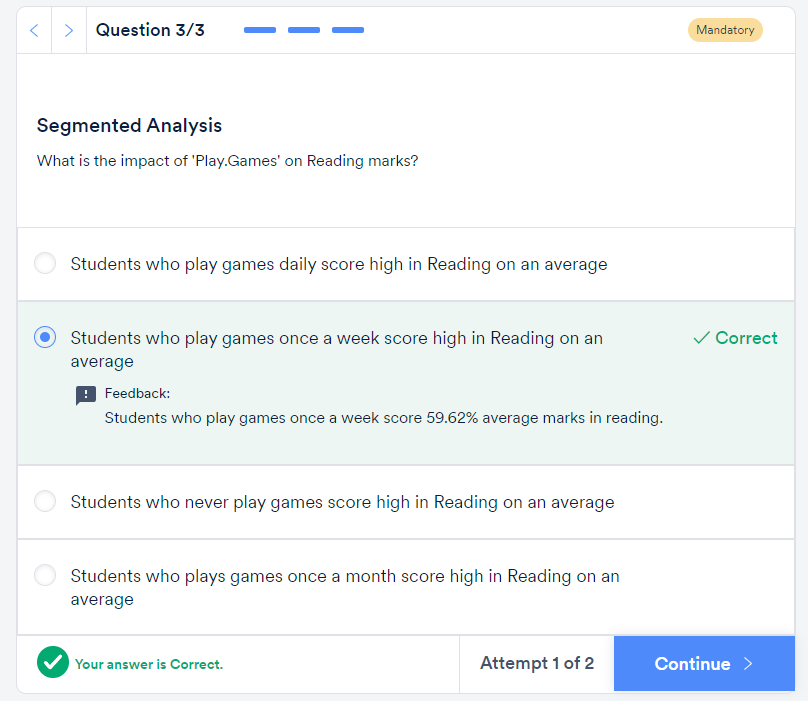

## Quick Way of Segmentation

## Comparison of Averages

In [187]:
data.groupby(by=(['Solve.Maths'])).mean()['Maths..']

Solve.Maths
Agree       32.800920
Disagree    30.841321
Neither     29.384388
Name: Maths.., dtype: float64

<AxesSubplot: xlabel='Mother.edu', ylabel='Reading..'>

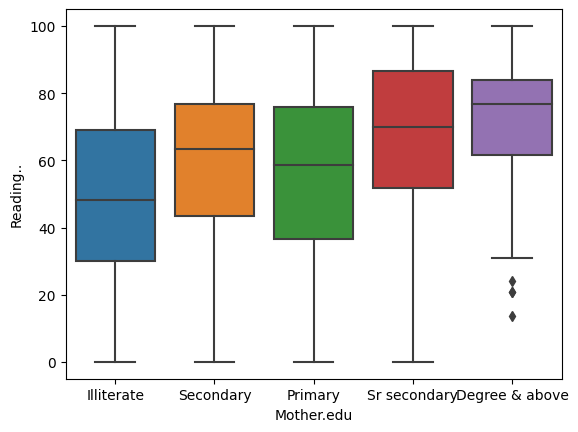

In [190]:

import seaborn as sns

sns.boxplot(data,x=data['Mother.edu'], y=data['Reading..'])

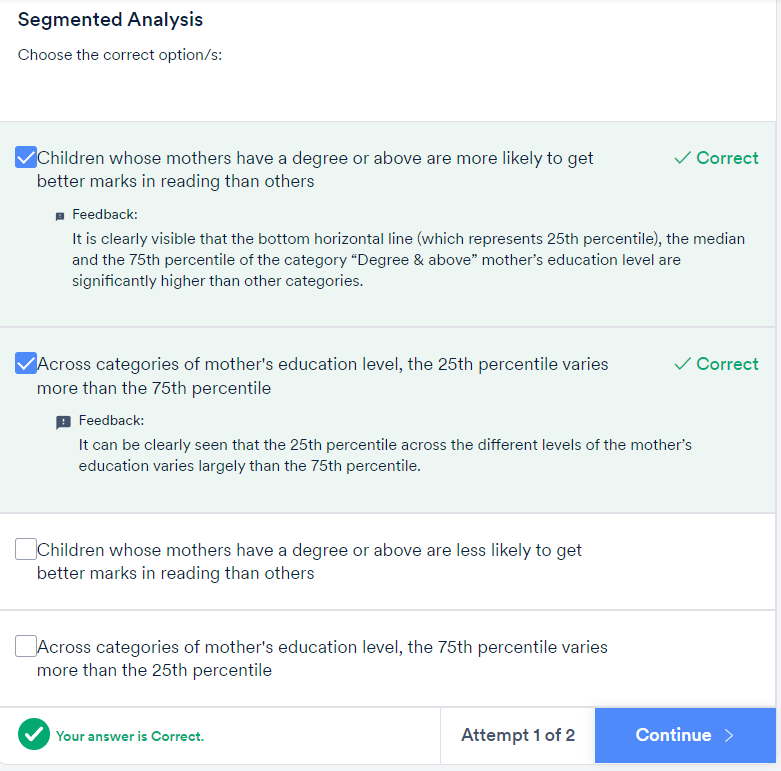

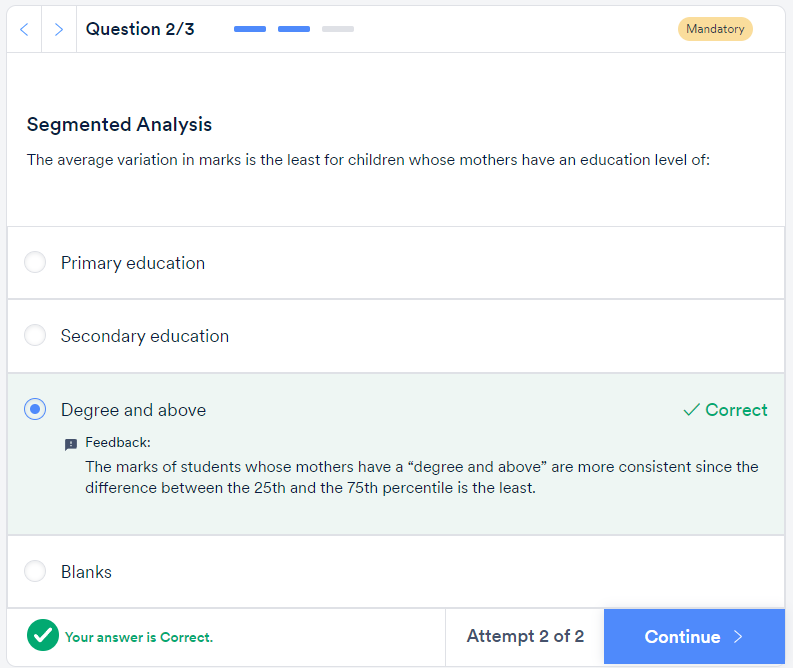

# Graded Questions

In [203]:
df = pd.read_csv('2011CensusDataFormat.csv')
df.head()

Table Name  State Code  Distt. Code Area Name    TRU Age-group   Total Pop  \
0      C2308           0            0     INDIA  Total  All ages  1210854977   
1      C2308           0            0     INDIA  Total       0-6   164515253   
2      C2308           0            0     INDIA  Total         7    24826640   
3      C2308           0            0     INDIA  Total         8    26968373   
4      C2308           0            0     INDIA  Total         9    23424638   

    Male Pop  Female Pop  Total illeterate  Male illeterate  \
0  623270258   587584719         447216165        188506636   
1   85752254    78762999         164515253         85752254   
2   12903364    11923276           6748214          3388683   
3   14061937    12906436           4131414          2013742   
4   12214985    11209653           2491904          1198339   

   Female illeterate  Total literate  Male literate  Female literate  
0          258709529       763638812      434763622        328875190  
1           78762999               0              0                0  
2            3359531        18078426        9514681          8563745  
3            2117672        22836959       12048195         10788764  
4            1293565        20932734       11016646          9916088

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Table Name         3132 non-null   object
 1   State Code         3132 non-null   int64 
 2   Distt. Code        3132 non-null   int64 
 3   Area Name          3132 non-null   object
 4   TRU                3132 non-null   object
 5   Age-group          3132 non-null   object
 6   Total Pop          3132 non-null   int64 
 7   Male Pop           3132 non-null   int64 
 8   Female Pop         3132 non-null   int64 
 9   Total illeterate   3132 non-null   int64 
 10  Male illeterate    3132 non-null   int64 
 11  Female illeterate  3132 non-null   int64 
 12  Total literate     3132 non-null   int64 
 13  Male literate      3132 non-null   int64 
 14  Female literate    3132 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 367.2+ KB


What percentage of females in the age group 20-24 are illiterate in India, i.e. out of all the females in the age group 20-24, what fraction is illiterate?df.info()

In [211]:
# 20-24
rowdata = df[(df['Age-group'] == '20-24') & (df['Area Name'] == 'INDIA') & (df['TRU'] == 'Total')]

female_illeterate = rowdata['Female illeterate']
total_pop = rowdata['Female Pop']


(female_illeterate/total_pop)*100


15    22.683085
dtype: float64

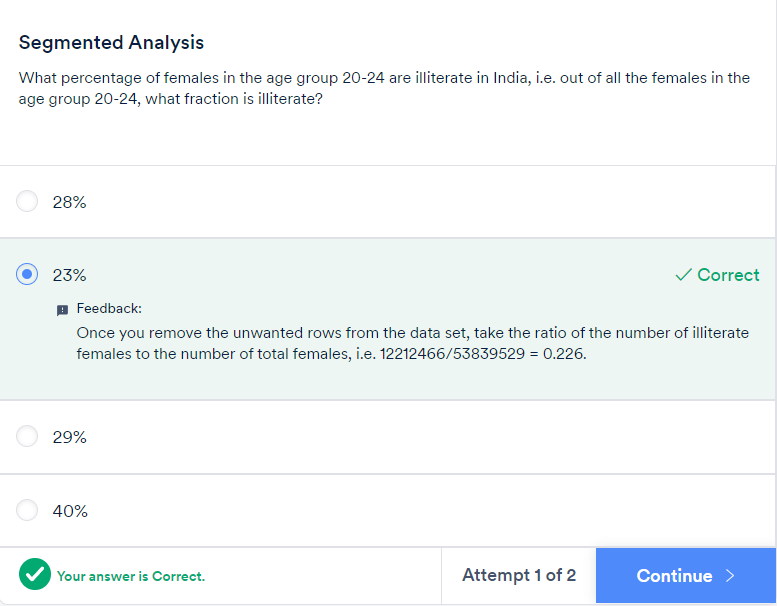

In [212]:
df['literacy rate'] = df['Total literate']/df['Total Pop']
df.head()

Table Name  State Code  Distt. Code Area Name    TRU Age-group   Total Pop  \
0      C2308           0            0     INDIA  Total  All ages  1210854977   
1      C2308           0            0     INDIA  Total       0-6   164515253   
2      C2308           0            0     INDIA  Total         7    24826640   
3      C2308           0            0     INDIA  Total         8    26968373   
4      C2308           0            0     INDIA  Total         9    23424638   

    Male Pop  Female Pop  Total illeterate  Male illeterate  \
0  623270258   587584719         447216165        188506636   
1   85752254    78762999         164515253         85752254   
2   12903364    11923276           6748214          3388683   
3   14061937    12906436           4131414          2013742   
4   12214985    11209653           2491904          1198339   

   Female illeterate  Total literate  Male literate  Female literate  \
0          258709529       763638812      434763622        328875190   
1           78762999               0              0                0   
2            3359531        18078426        9514681          8563745   
3            2117672        22836959       12048195         10788764   
4            1293565        20932734       11016646          9916088   

   literacy rate  
0       0.630661  
1       0.000000  
2       0.728187  
3       0.846805  
4       0.893620

<AxesSubplot: xlabel='Age-group', ylabel='literacy rate'>

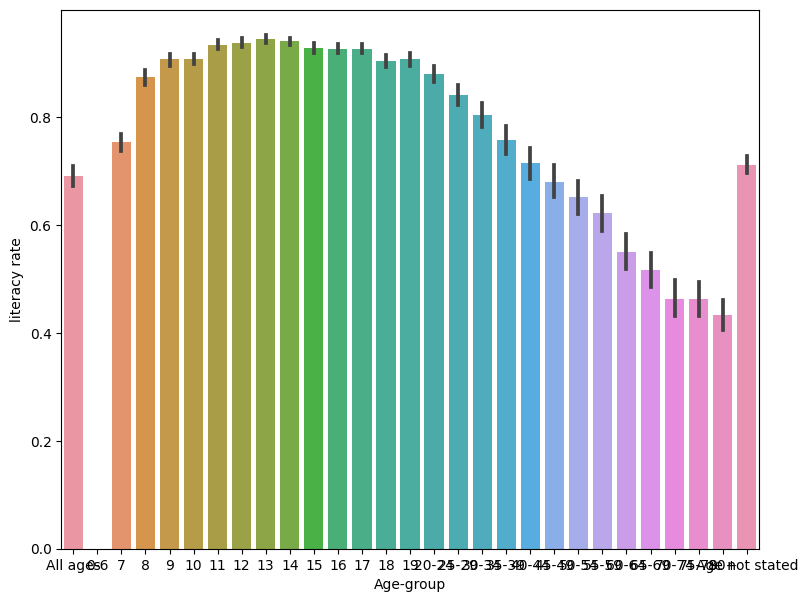

In [214]:
plt.figure(figsize=[9,7])
sns.barplot(data=df, x=df['Age-group'], y=df['literacy rate'])

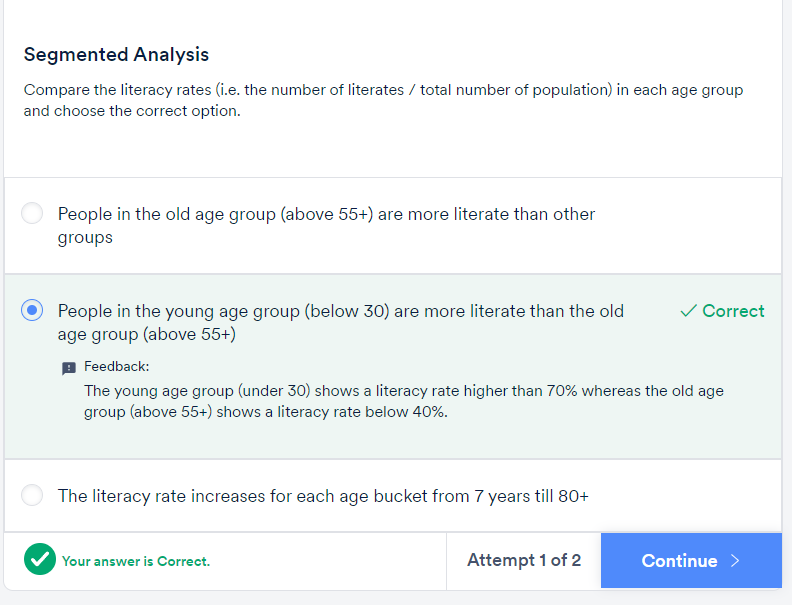

In [233]:
format_data = df[(df['Age-group'] == 'All ages') & (df['TRU'] == 'Total') & (df['Area Name'] != 'INDIA')]
format_data.head()

Table Name  State Code  Distt. Code                 Area Name    TRU  \
87       C2308           1            0   State - JAMMU & KASHMIR  Total   
174      C2308           2            0  State - HIMACHAL PRADESH  Total   
261      C2308           3            0            State - PUNJAB  Total   
348      C2308           4            0        State - CHANDIGARH  Total   
435      C2308           5            0       State - UTTARAKHAND  Total   

    Age-group  Total Pop  Male Pop  Female Pop  Total illeterate  \
87   All ages   12541302   6640662     5900640           5474069   
174  All ages    6864602   3481873     3382729           1824866   
261  All ages   27743338  14639465    13103873           9036201   
348  All ages    1055450    580663      474787            250012   
435  All ages   10086292   5137773     4948519           3205339   

     Male illeterate  Female illeterate  Total literate  Male literate  \
87           2375991            3098078         7067233        4264671   
174           729283            1095583         5039736        2752590   
261          4203409            4832792        18707137       10436056   
348           115317             134695          805438         465346   
435          1274065            1931274         6880953        3863708   

     Female literate  literacy rate  female literacy rate  
87           2802562       0.563517              0.223467  
174          2287146       0.734163              0.333180  
261          8271081       0.674293              0.298129  
348           340092       0.763123              0.322225  
435          3017245       0.682208              0.299143

In [234]:
format_data['female literacy rate'] = df['Female literate']/df['Female Pop']
format_data.head()

Table Name  State Code  Distt. Code                 Area Name    TRU  \
87       C2308           1            0   State - JAMMU & KASHMIR  Total   
174      C2308           2            0  State - HIMACHAL PRADESH  Total   
261      C2308           3            0            State - PUNJAB  Total   
348      C2308           4            0        State - CHANDIGARH  Total   
435      C2308           5            0       State - UTTARAKHAND  Total   

    Age-group  Total Pop  Male Pop  Female Pop  Total illeterate  \
87   All ages   12541302   6640662     5900640           5474069   
174  All ages    6864602   3481873     3382729           1824866   
261  All ages   27743338  14639465    13103873           9036201   
348  All ages    1055450    580663      474787            250012   
435  All ages   10086292   5137773     4948519           3205339   

     Male illeterate  Female illeterate  Total literate  Male literate  \
87           2375991            3098078         7067233        4264671   
174           729283            1095583         5039736        2752590   
261          4203409            4832792        18707137       10436056   
348           115317             134695          805438         465346   
435          1274065            1931274         6880953        3863708   

     Female literate  literacy rate  female literacy rate  
87           2802562       0.563517              0.474959  
174          2287146       0.734163              0.676125  
261          8271081       0.674293              0.631194  
348           340092       0.763123              0.716304  
435          3017245       0.682208              0.609727

In [235]:
format_data[format_data['female literacy rate'] == format_data['female literacy rate'].max()]

Table Name  State Code  Distt. Code       Area Name    TRU Age-group  \
2784      C2308          32            0  State - KERALA  Total  All ages   

      Total Pop  Male Pop  Female Pop  Total illeterate  Male illeterate  \
2784   33406061  16027412    17378649           5270237          2322509   

      Female illeterate  Total literate  Male literate  Female literate  \
2784            2947728        28135824       13704903         14430921   

      literacy rate  female literacy rate  
2784       0.842237              0.830382

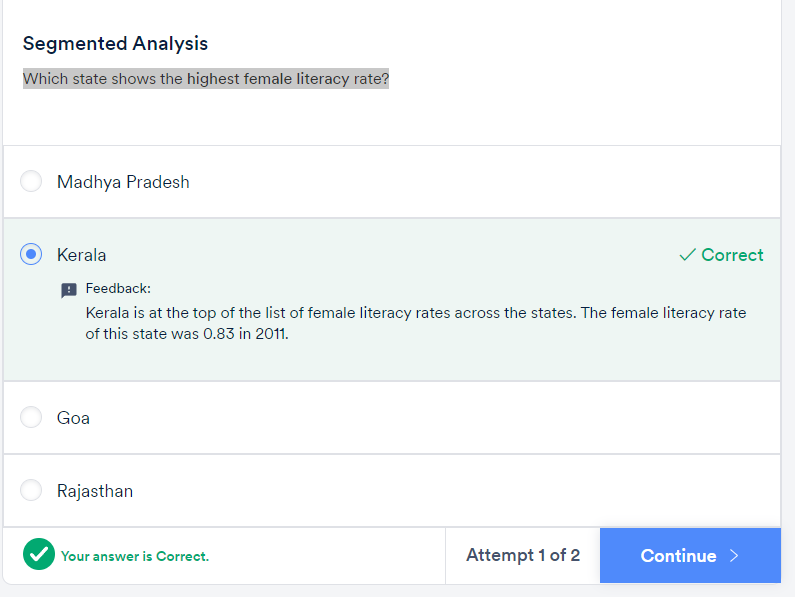

In [236]:
format_data['lowest literacy rate'] = df['Total literate']/df['Total Pop']
format_data.head()

Table Name  State Code  Distt. Code                 Area Name    TRU  \
87       C2308           1            0   State - JAMMU & KASHMIR  Total   
174      C2308           2            0  State - HIMACHAL PRADESH  Total   
261      C2308           3            0            State - PUNJAB  Total   
348      C2308           4            0        State - CHANDIGARH  Total   
435      C2308           5            0       State - UTTARAKHAND  Total   

    Age-group  Total Pop  Male Pop  Female Pop  Total illeterate  \
87   All ages   12541302   6640662     5900640           5474069   
174  All ages    6864602   3481873     3382729           1824866   
261  All ages   27743338  14639465    13103873           9036201   
348  All ages    1055450    580663      474787            250012   
435  All ages   10086292   5137773     4948519           3205339   

     Male illeterate  Female illeterate  Total literate  Male literate  \
87           2375991            3098078         7067233        4264671   
174           729283            1095583         5039736        2752590   
261          4203409            4832792        18707137       10436056   
348           115317             134695          805438         465346   
435          1274065            1931274         6880953        3863708   

     Female literate  literacy rate  female literacy rate  \
87           2802562       0.563517              0.474959   
174          2287146       0.734163              0.676125   
261          8271081       0.674293              0.631194   
348           340092       0.763123              0.716304   
435          3017245       0.682208              0.609727   

     lowest literacy rate  
87               0.563517  
174              0.734163  
261              0.674293  
348              0.763123  
435              0.682208

In [237]:
format_data[format_data['lowest literacy rate'] == format_data['lowest literacy rate'].min()]

Table Name  State Code  Distt. Code      Area Name    TRU Age-group  \
870      C2308          10            0  State - BIHAR  Total  All ages   

     Total Pop  Male Pop  Female Pop  Total illeterate  Male illeterate  \
870  104099452  54278157    49821295          51594899         22670134   

     Female illeterate  Total literate  Male literate  Female literate  \
870           28924765        52504553       31608023         20896530   

     literacy rate  female literacy rate  lowest literacy rate  
870       0.504369               0.41943              0.504369

In [238]:
format_data.sort_values('lowest literacy rate', ascending=True)

Table Name  State Code  Distt. Code                          Area Name  \
870       C2308          10            0                      State - BIHAR   
1044      C2308          12            0          State - ARUNACHAL PRADESH   
1740      C2308          20            0                  State - JHARKHAND   
696       C2308           8            0                  State - RAJASTHAN   
87        C2308           1            0            State - JAMMU & KASHMIR   
783       C2308           9            0              State - UTTAR PRADESH   
2001      C2308          23            0             State - MADHYA PRADESH   
2436      C2308          28            0             State - ANDHRA PRADESH   
1479      C2308          17            0                  State - MEGHALAYA   
1914      C2308          22            0               State - CHHATTISGARH   
1566      C2308          18            0                      State - ASSAM   
1827      C2308          21            0                     State - ODISHA   
2262      C2308          26            0       State - DADRA & NAGAR HAVELI   
522       C2308           6            0                    State - HARYANA   
2523      C2308          29            0                  State - KARNATAKA   
1218      C2308          14            0                    State - MANIPUR   
1653      C2308          19            0                State - WEST BENGAL   
261       C2308           3            0                     State - PUNJAB   
1131      C2308          13            0                   State - NAGALAND   
2088      C2308          24            0                    State - GUJARAT   
435       C2308           5            0                State - UTTARAKHAND   
2871      C2308          33            0                 State - TAMIL NADU   
2349      C2308          27            0                State - MAHARASHTRA   
957       C2308          11            0                     State - SIKKIM   
174       C2308           2            0           State - HIMACHAL PRADESH   
609       C2308           7            0               State - NCT OF DELHI   
348       C2308           4            0                 State - CHANDIGARH   
1392      C2308          16            0                    State - TRIPURA   
2958      C2308          34            0                 State - PUDUCHERRY   
1305      C2308          15            0                    State - MIZORAM   
3045      C2308          35            0  State - ANDAMAN & NICOBAR ISLANDS   
2175      C2308          25            0                State - DAMAN & DIU   
2610      C2308          30            0                        State - GOA   
2697      C2308          31            0                State - LAKSHADWEEP   
2784      C2308          32            0                     State - KERALA   

        TRU Age-group  Total Pop   Male Pop  Female Pop  Total illeterate  \
870   Total  All ages  104099452   54278157    49821295          51594899   
1044  Total  All ages    1383727     713912      669815            617722   
1740  Total  All ages   32988134   16930315    16057819          14660065   
696   Total  All ages   68548437   35550997    32997440          30273155   
87    Total  All ages   12541302    6640662     5900640           5474069   
783   Total  All ages  199812341  104480510    95331831          85414786   
2001  Total  All ages   72626809   37612306    35014503          29775640   
2436  Total  All ages   84580777   42442146    42138631          34024017   
1479  Total  All ages    2966889    1491832     1475057           1181884   
1914  Total  All ages   25545198   12832895    12712303          10165276   
1566  Total  All ages   31205576   15939443    15266133          12027599   
1827  Total  All ages   41974218   21212136    20762082          15231623   
2262  Total  All ages     343709     193760      149949            120479   
522   Total  All ages   25351462   13494734    11856728           8752474   
2523 

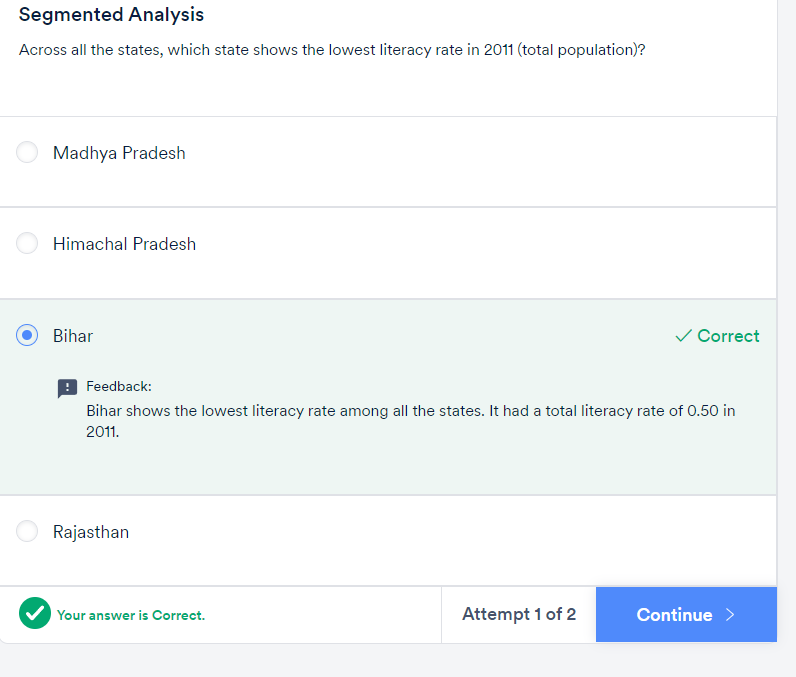

# Bivariate Analysis

- Bivariate analysis on continuous variables

- Bivariate analysis on categorical variables

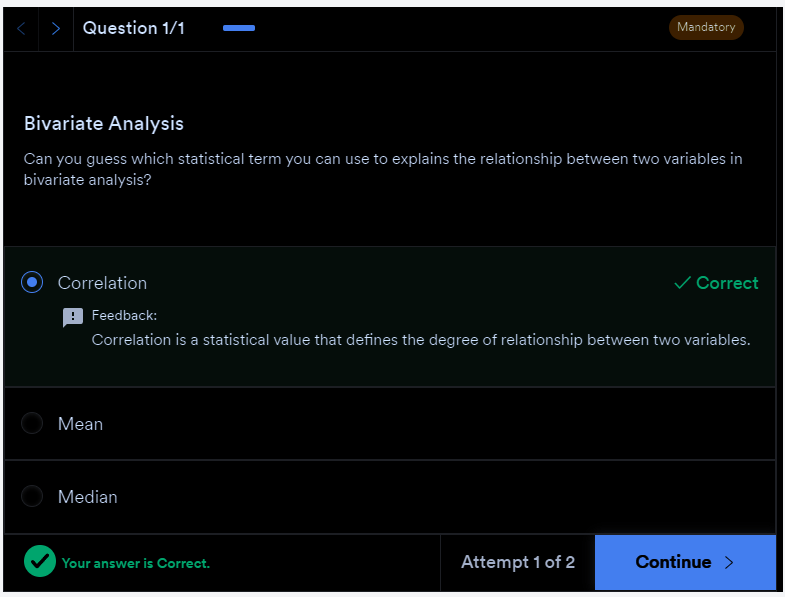

- To summarise, correlation is a number between -1 and 1 which quantifies the extent to which two variables ‘correlate’ with each other.

    - If one increases as the other increases, the correlation is positive

    - If one decreases as the other increases, the correlation is negative

    - mIf one stays constant as the other varies, the correlation is zero

In [265]:
df = pd.read_csv('EDA_Gold_Silver_prices.csv')
df.head()

Month  SilverPrice  GoldPrice
0  Mar-97       186.48   12619.24
1  Apr-97       170.65   12338.59
2  May-97       170.44   12314.94
3  Jun-97       169.96   12202.78
4  Jul-97       155.80   11582.07

In [256]:
df.dtypes

Month           object
SilverPrice    float64
GoldPrice      float64
dtype: object

### Convert Month column to date type

In [ ]:
from datetime import datetime


df["Month"]=list(map(lambda x:datetime.strptime(x,'%b-%y'),df["Month"]))

### Calculate correlation 

In [248]:
corr_value = df['SilverPrice'].corr(df['GoldPrice'])
round(corr_value,2)

0.95

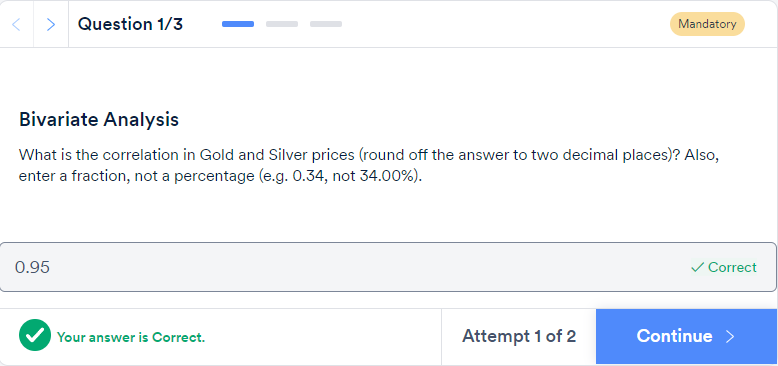

### Create a column year

In [270]:
df['year'] = pd.DatetimeIndex(df['Month']).year
df.head()

Month  SilverPrice  GoldPrice  year
0 1997-03-01       186.48   12619.24  1997
1 1997-04-01       170.65   12338.59  1997
2 1997-05-01       170.44   12314.94  1997
3 1997-06-01       169.96   12202.78  1997
4 1997-07-01       155.80   11582.07  1997

### get data for year 2008

In [277]:
df_2008 = df[df['year'] == 2008]
df_2008.head()

Month  SilverPrice  GoldPrice  year
130 2008-01-01       632.29   35025.78  2008
131 2008-02-01       701.87   36642.46  2008
132 2008-03-01       775.49   39082.77  2008
133 2008-04-01       700.96   36416.00  2008
134 2008-05-01       718.20   37435.38  2008

### correlation for years 2208

In [279]:
corr_value = df_2008['GoldPrice'].corr(df_2008['SilverPrice'])
round(corr_value, 2)

0.01

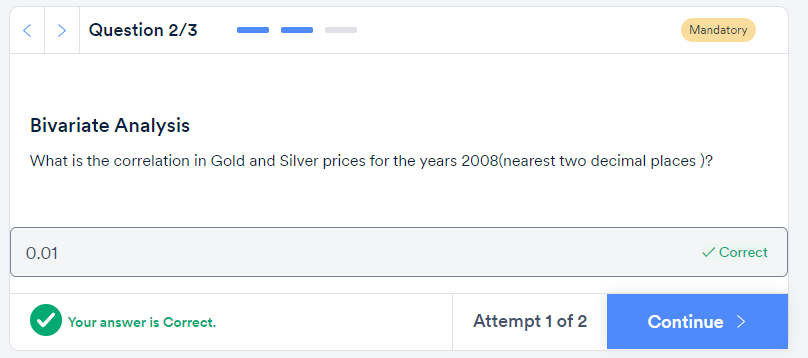

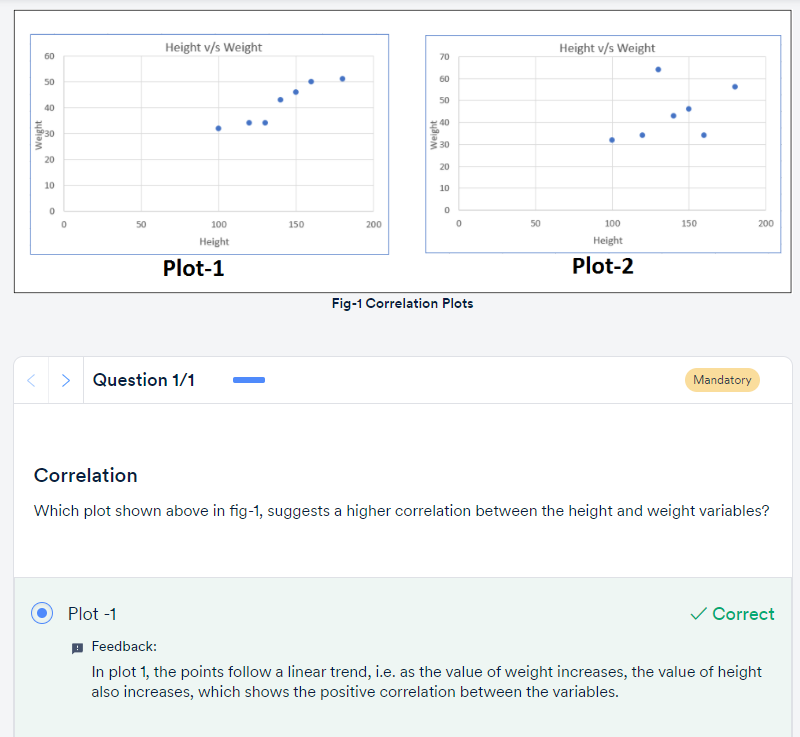

## Business Problems Involving Correlation

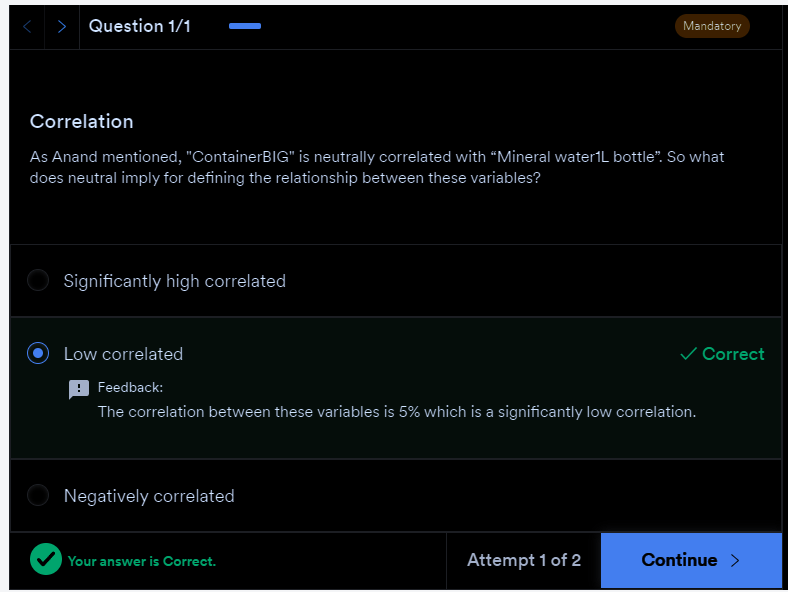

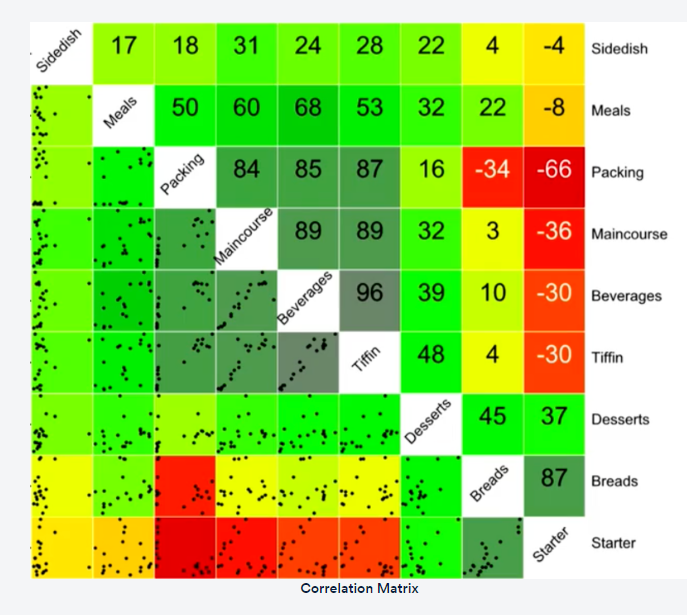

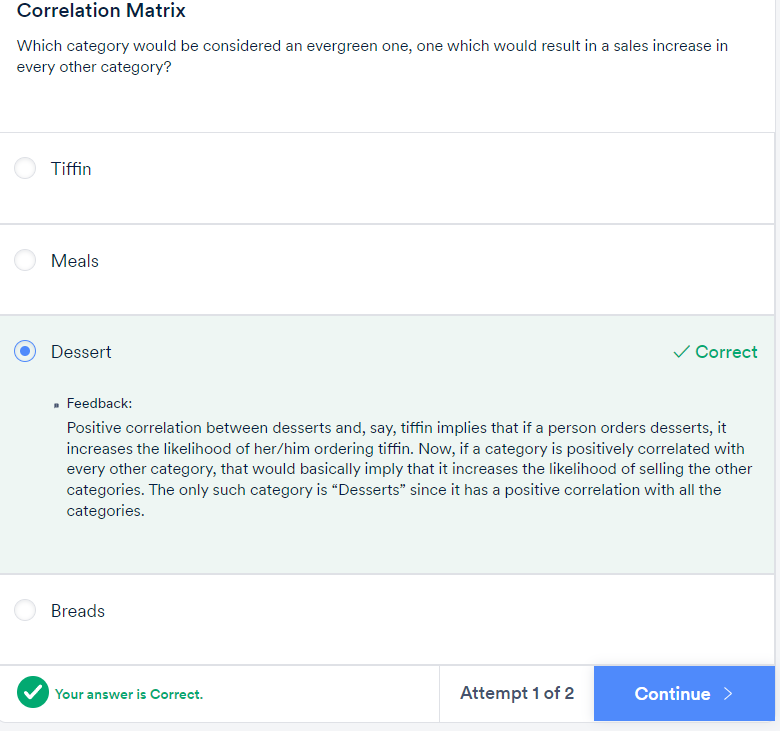

In [290]:
currencies = pd.read_csv('currencies.csv')
currencies.head()
currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Currency                    11 non-null     object 
 1   Chinese Yuan                11 non-null     float64
 2   Euro                        11 non-null     float64
 3   Japanese Yen                10 non-null     float64
 4   U.K. Pound Sterling         11 non-null     float64
 5   U.S. Dollar                 11 non-null     float64
 6   Algerian Dinar              9 non-null      float64
 7   Australian Dollar           11 non-null     float64
 8   Bahrain Dinar               11 non-null     float64
 9   Botswana Pula               9 non-null      float64
 10  Brazilian Real              11 non-null     float64
 11  Brunei Dollar               10 non-null     float64
 12  Canadian Dollar             10 non-null     float64
 13  Chilean Peso                11 non-nu

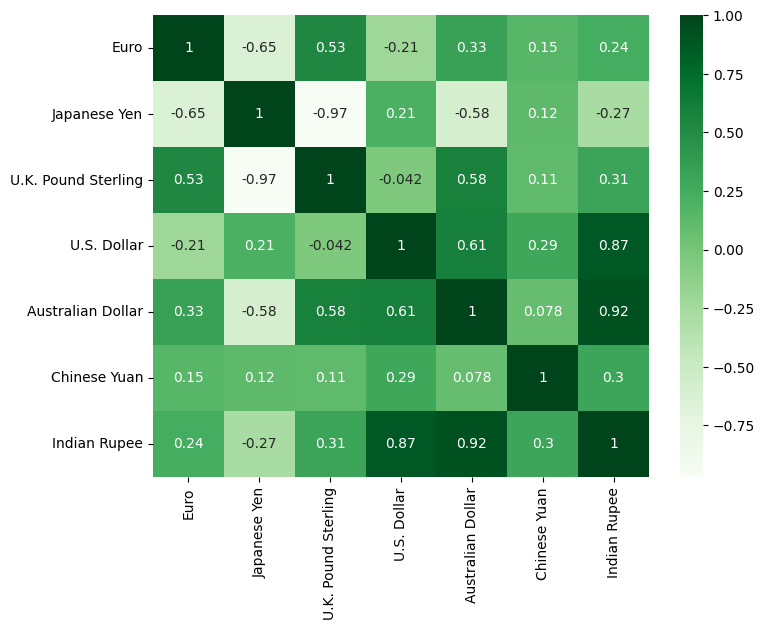

In [297]:
import matplotlib.pyplot as plt


df_selected = currencies.loc[:,['Euro','Japanese Yen', 'U.K. Pound Sterling', 'U.S. Dollar', 'Australian Dollar','Chinese Yuan', 'Indian Rupee']]

corr = df_selected.corr()

# corr.style.background_gradient(cmap='Greens').set_precision(2) # THIS ALSO CA BE USED

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()


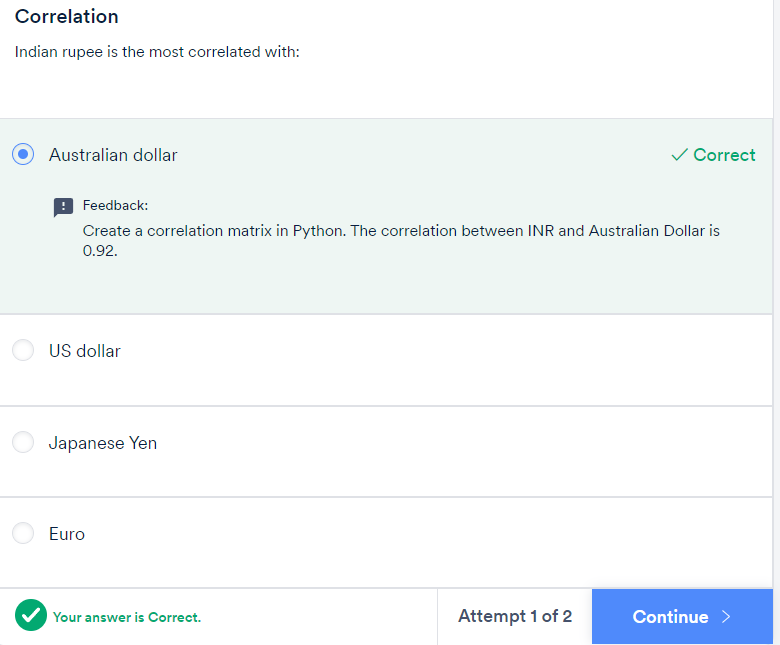

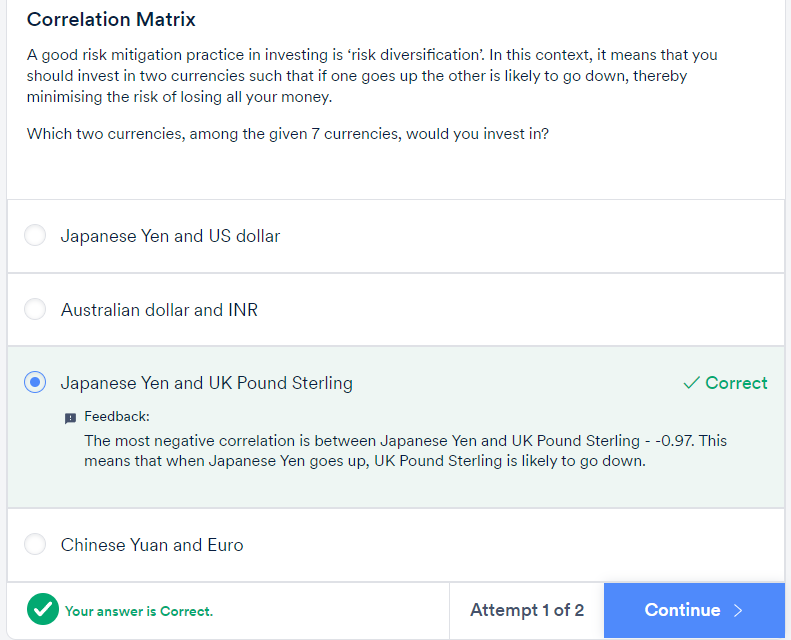

## Bivariate Analysis on Categorical Variables

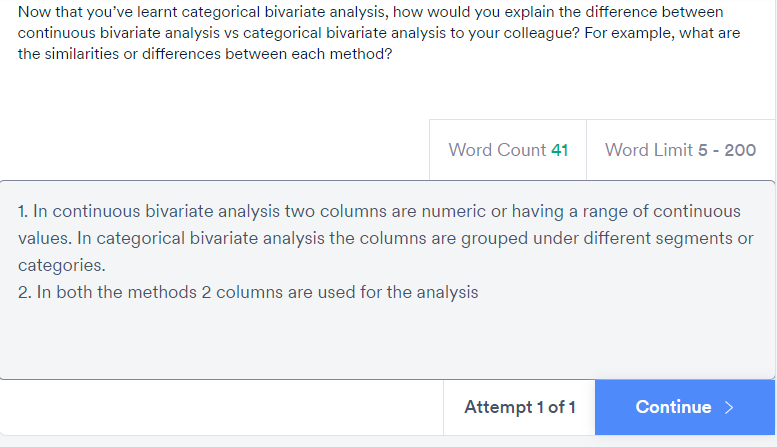

- To see the distribution of two categorical variables. For example, if you want to compare the number of boys and girls who play games, you can make a ‘cross table’ as given below:
    
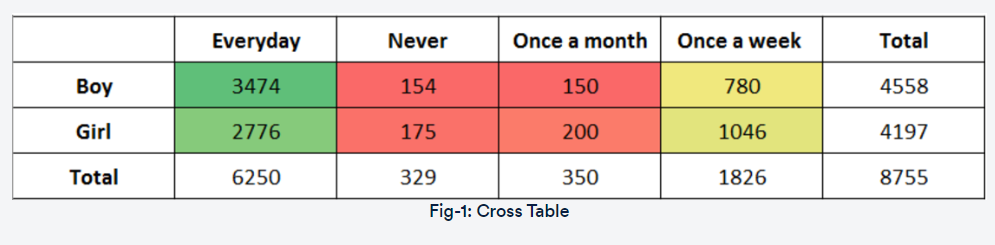

- To see the distribution of two categorical variables with one continuous variable. For example, you saw how a student’s percentage in science is distributed based on the father’s occupation (categorical variable 1) and the poverty level (categorical variable 2).

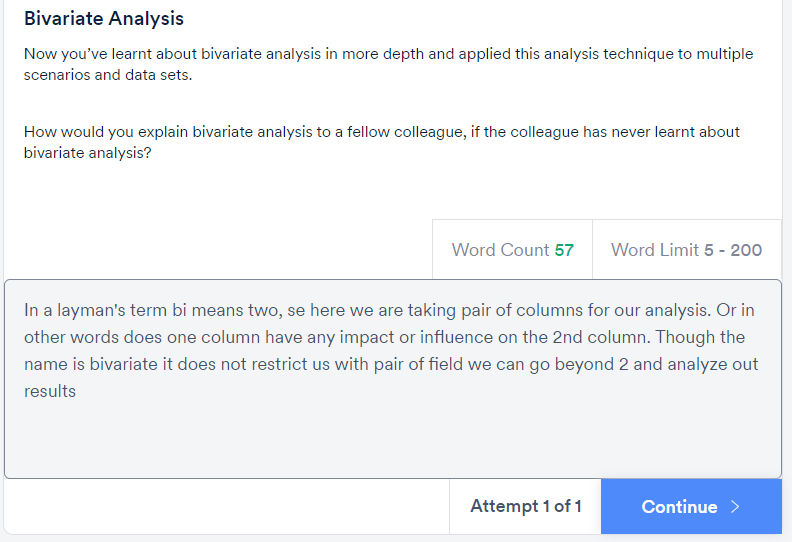

## Graded Questions

In [345]:
nas = pd.read_csv('nas.csv')

In [355]:
df2 = nas.pivot_table( index=['Mother.edu'], columns='Siblings', aggfunc="count")
df2

Age                                                 \
Siblings       1 sibling 2 siblings 3 siblings 4+ siblings Single child   
Mother.edu                                                                
Degree & above        86         35         11           5           19   
Illiterate           510        905        525         456           83   
Primary              670        754        410         244           89   
Secondary           1026        828        342         244           87   
Sr secondary         203        127         45          21           24   

               Answer.English.WB                                    \
Siblings               1 sibling 2 siblings 3 siblings 4+ siblings   
Mother.edu                                                           
Degree & above                88         36         11           6   
Illiterate                   533        917        530         468   
Primary                      688        769        414         248   
Secondary                   1046        844        347         253   
Sr secondary                 205        132         48          23   

                             ...  Watch.TV                                    \
Siblings       Single child  ... 1 sibling 2 siblings 3 siblings 4+ siblings   
Mother.edu                   ...                                               
Degree & above           20  ...        88         36         11           6   
Illiterate               86  ...       531        917        528         468   
Primary                  92  ...       688        767        415         249   
Secondary                92  ...      1049        845        346         252   
Sr secondary             24  ...       205        132         48          23   

                             X..Books                                    \
Siblings       Single child 1 sibling 2 siblings 3 siblings 4+ siblings   
Mother.edu                                                                
Degree & above           20        87         36         11           6   
Illiterate               87       478        822        467         414   
Primary                  92       640        705        372         228   
Secondary                92       998        808        324         229   
Sr secondary             24       197        124         46          22   

                             
Siblings       Single child  
Mother.edu                   
Degree & above           20  
Illiterate               80  
Primary                  87  
Secondary                87  
Sr secondary             24  

[5 rows x 310 columns]

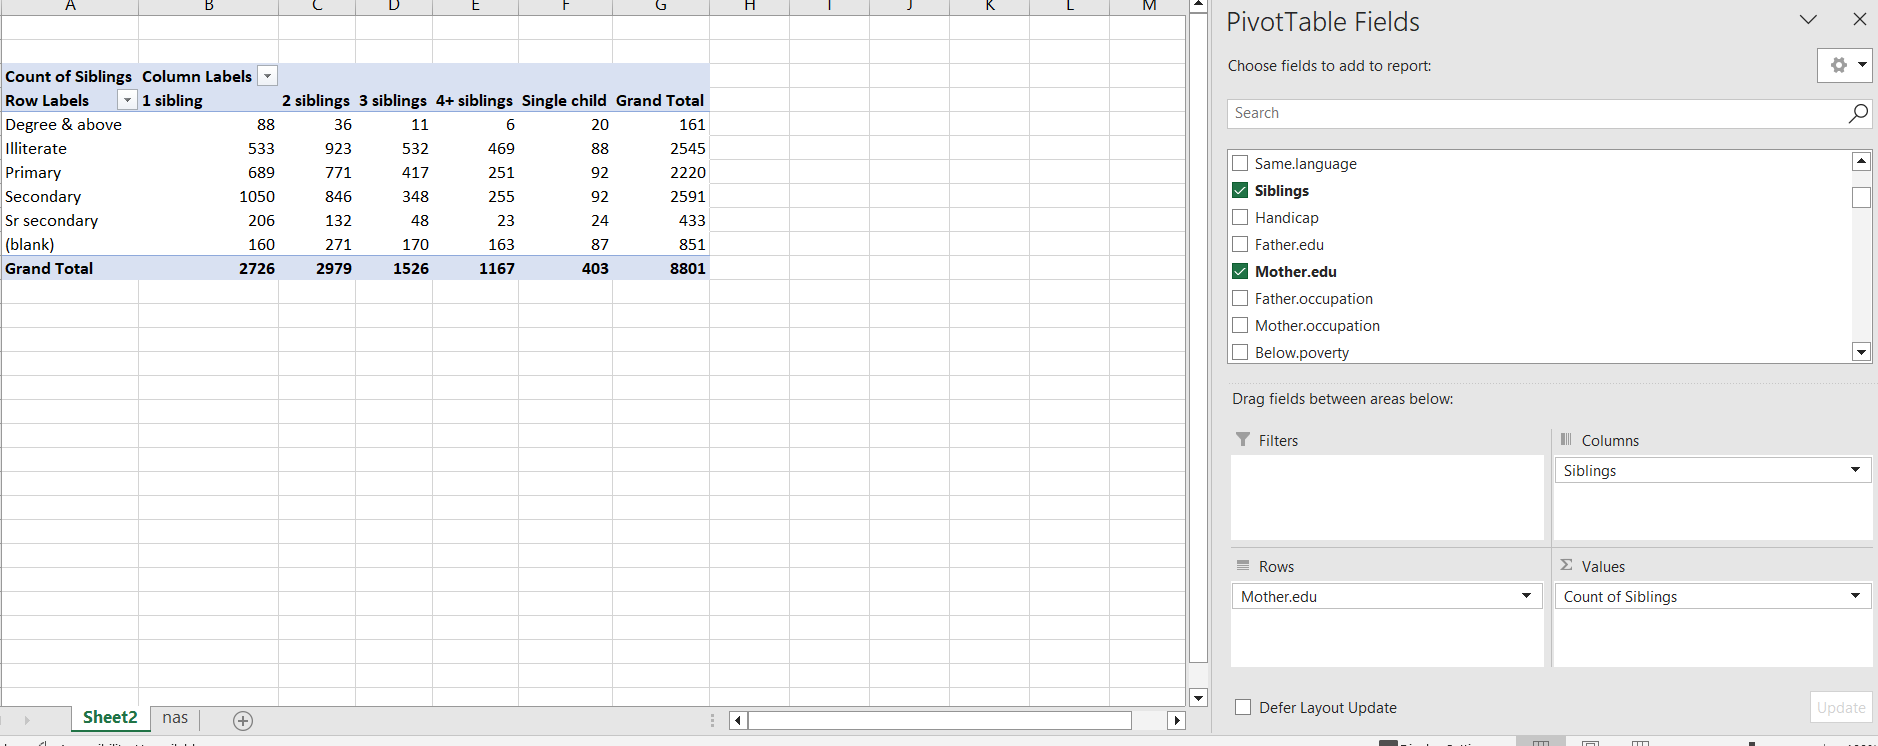

Bivariate Analysis
You also want to understand how the average science marks vary with the father’s education level and age. Neglect the age group of 11 years since there are very few children in that segment. Mark the correct statement:

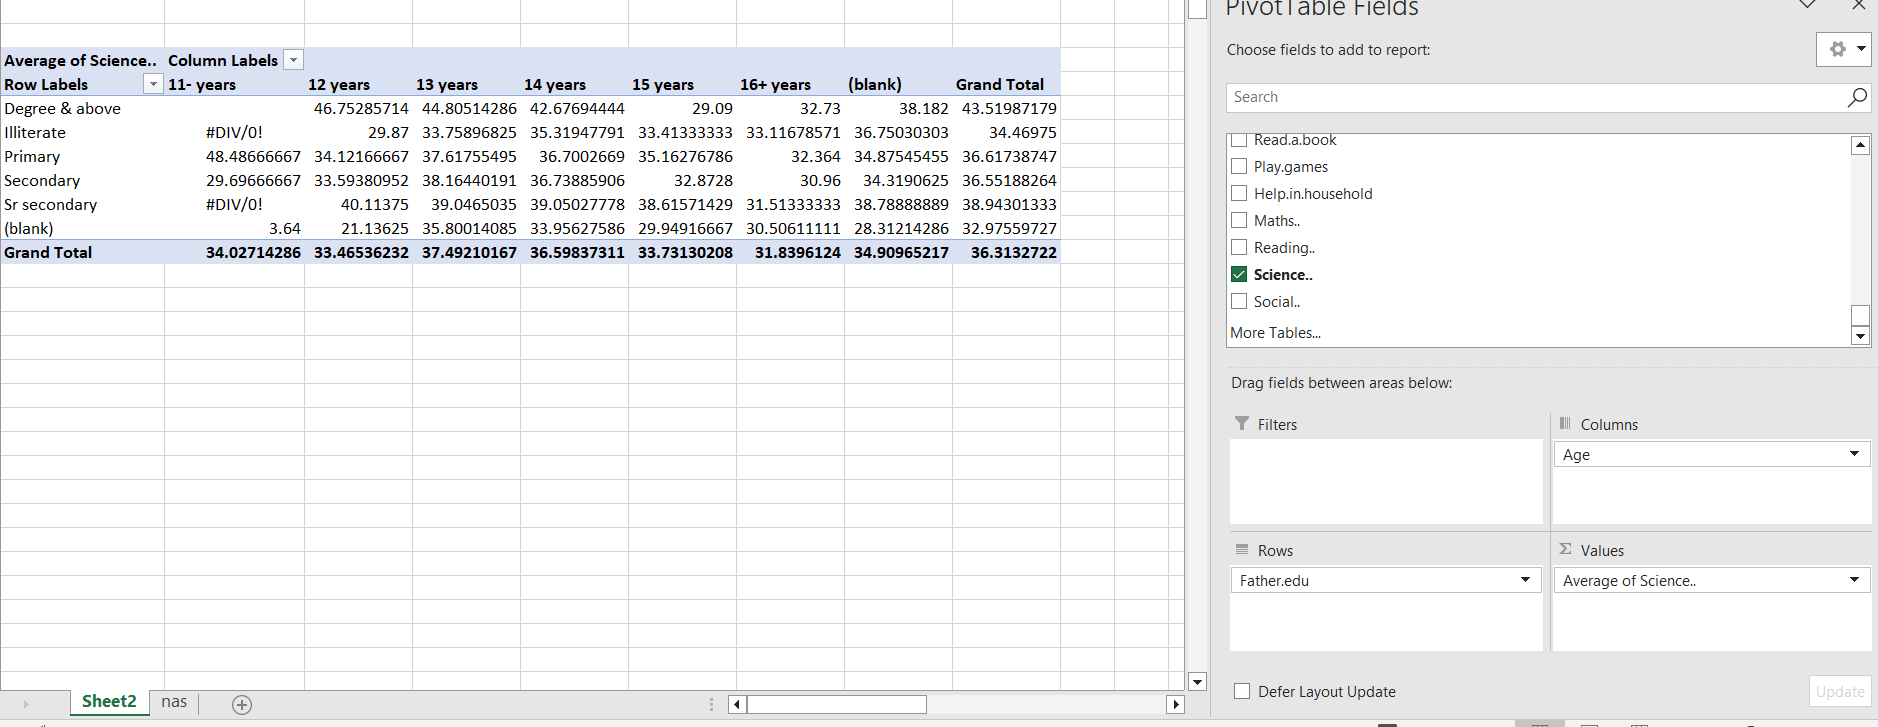

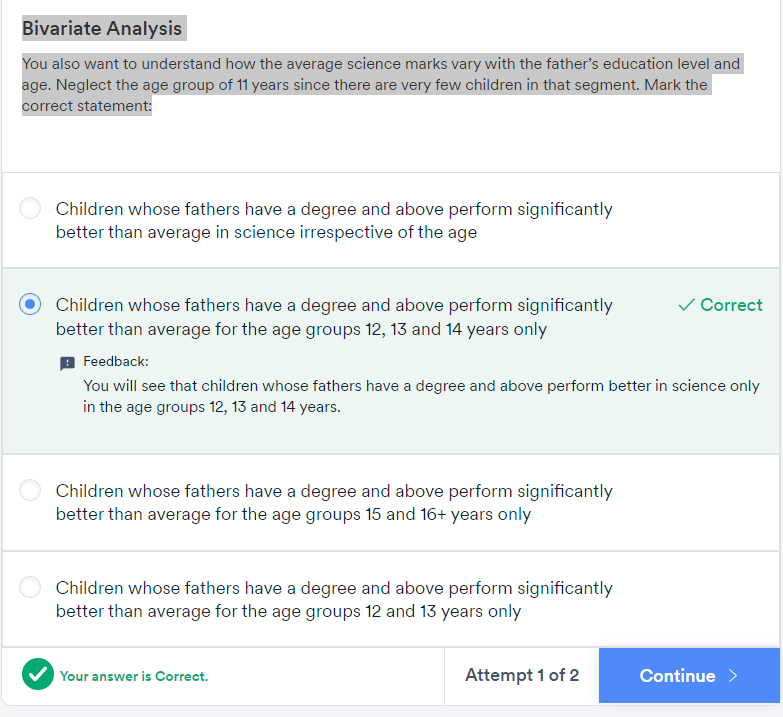

# Derived Metrics

The agenda for the session is as follows:

- Type-driven metrics

- Business-driven metrics

- Data-driven metrics

# Types of Derived Metrics: Type-driven metrics

Steven’s typology

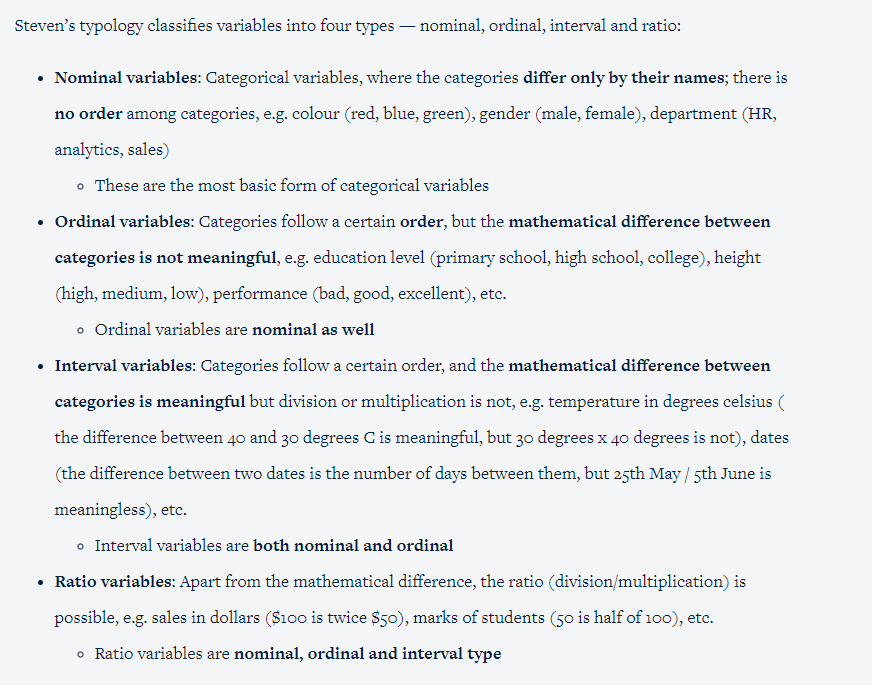

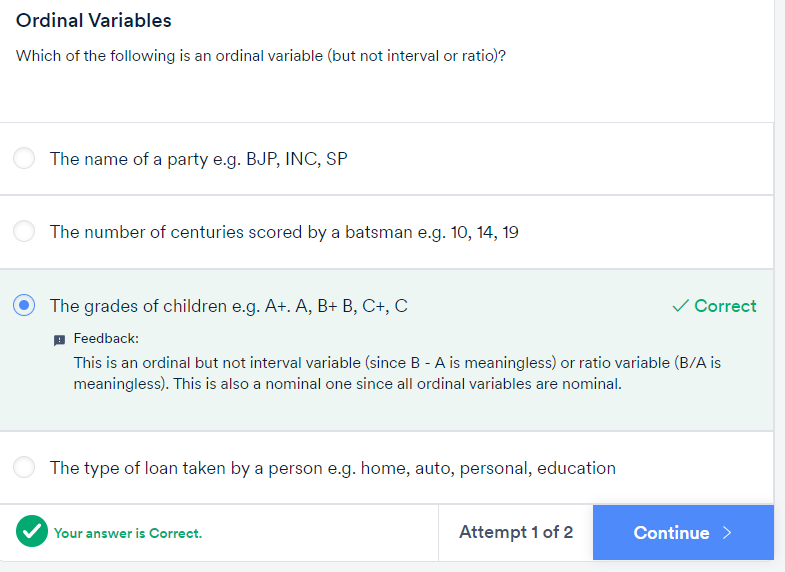

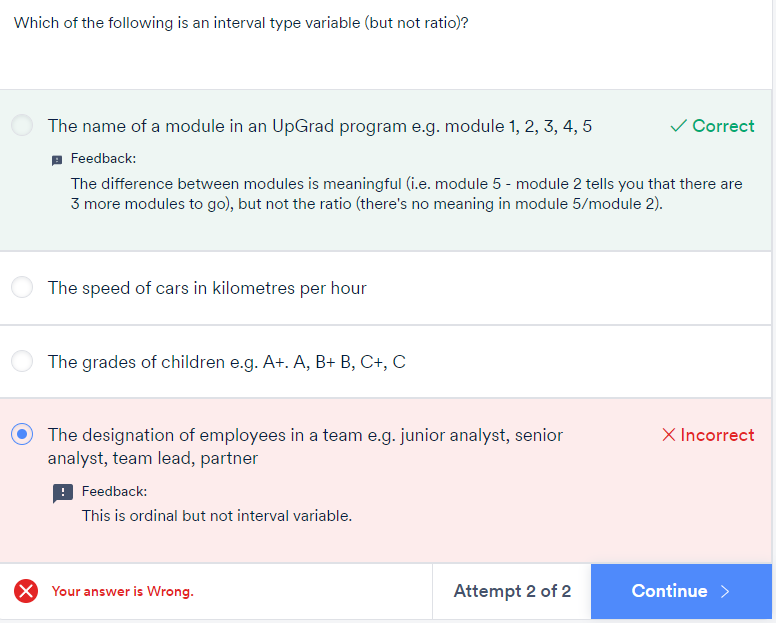

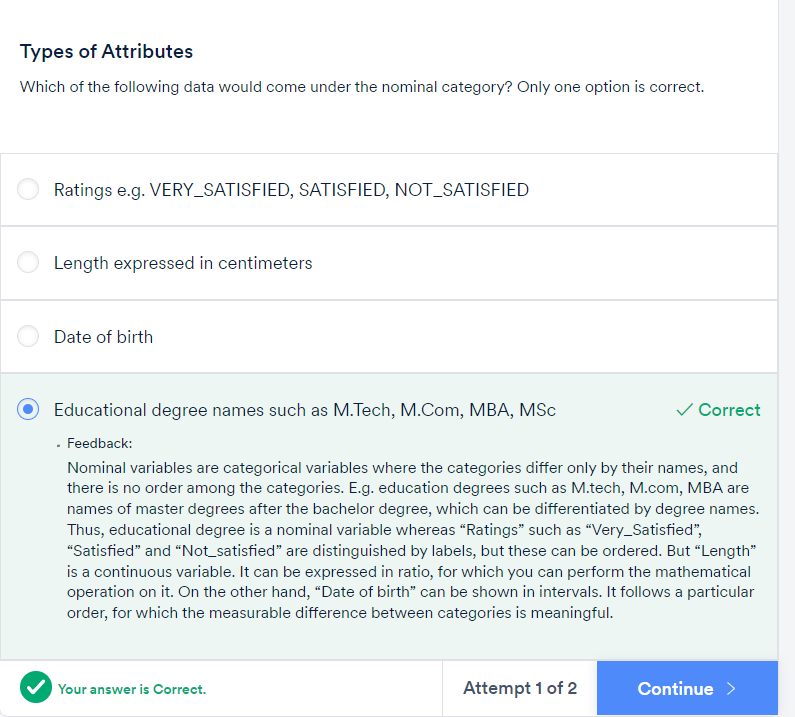

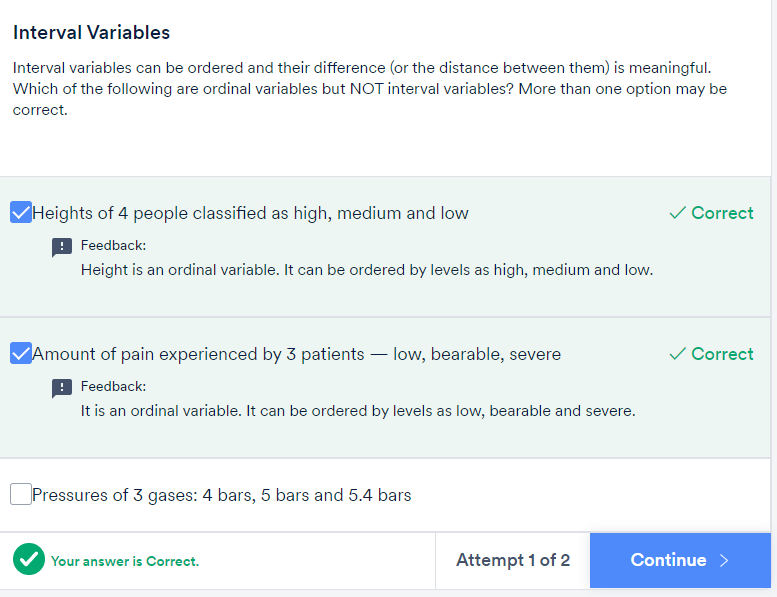

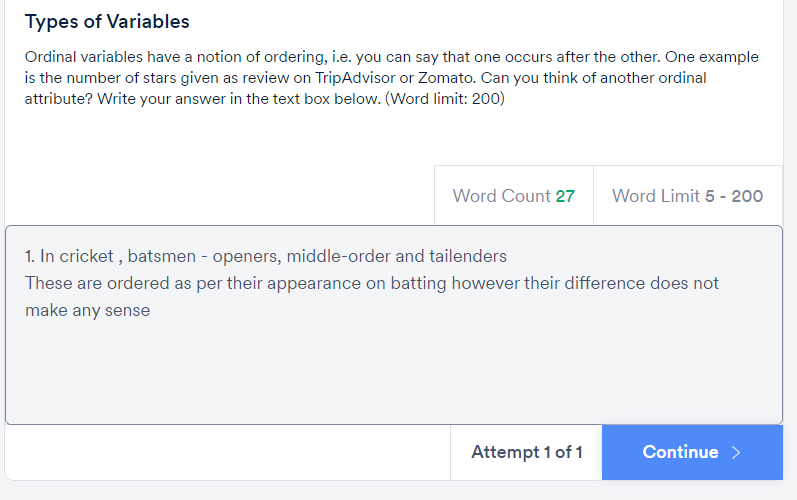

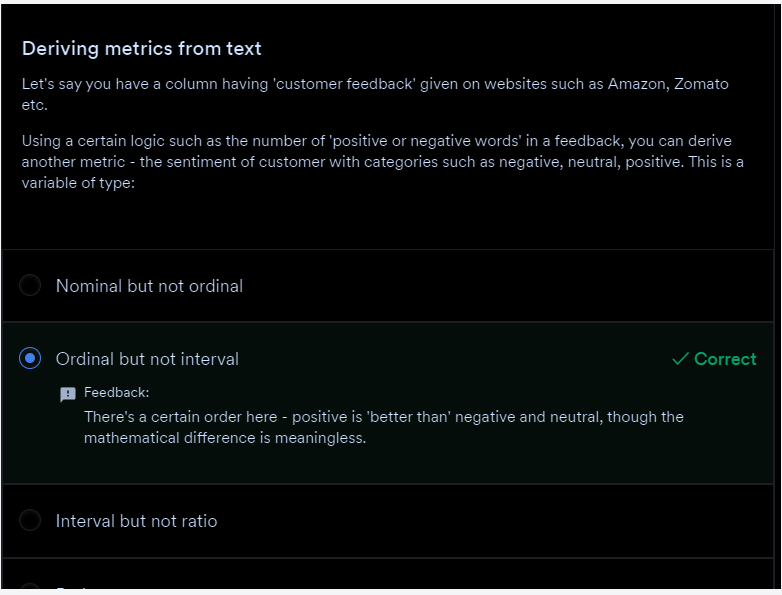

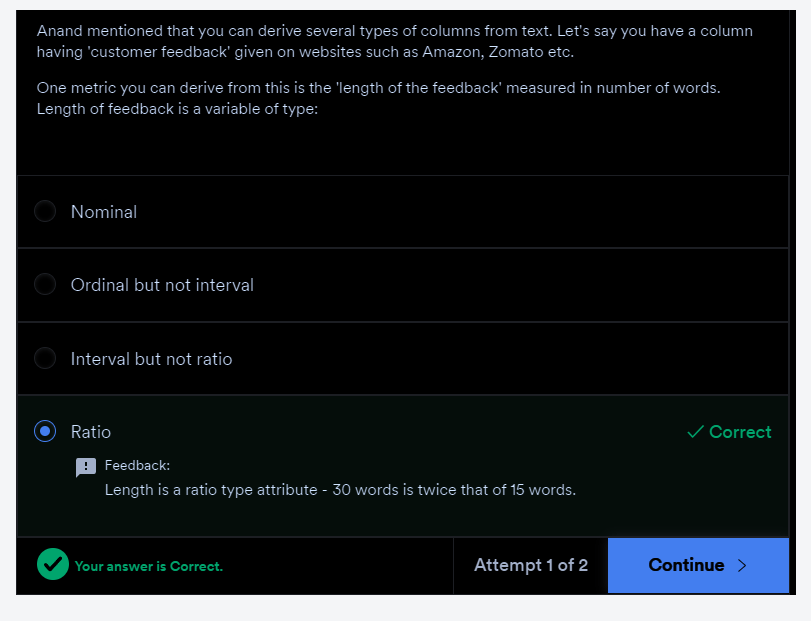

Type Driven Metrics : Location
- District, city, state, Country
- North,East,South, West
- Urban,Rural, Metro
- Time Zone
- Rulling party

# Types of Derived Metrics: Business Driven Metrics

In [361]:
nas = pd.read_csv('nas.csv')
nas.head()

STUID        State  District Gender       Age  Category  \
0  26011001001  Maharashtra         1   Girl  13 years       3.0   
1  26011001002  Maharashtra         1   Girl  15 years       3.0   
2  26011001003  Maharashtra         1   Girl  14 years       3.0   
3  26011001004  Maharashtra         1    Boy  13 years       3.0   
4  26011001005  Maharashtra         1   Girl  14 years       3.0   

   Same.language    Siblings Handicap      Father.edu  ...  \
0            2.0   1 sibling       No      Illiterate  ...   
1            2.0  3 siblings       No             NaN  ...   
2            2.0  3 siblings       No  Degree & above  ...   
3            2.0  3 siblings       No       Secondary  ...   
4            2.0  2 siblings       No         Primary  ...   

  Express.science.views     Watch.TV Read.magazine   Read.a.book   Play.games  \
0                 Agree    Every day         Never  Once a month  Once a week   
1                 Agree  Once a week         Never         Never  Once a week   
2                 Agree    Every day  Once a month  Once a month  Once a week   
3                 Agree    Every day     Every day         Never    Every day   
4               Neither        Never         Never  Once a month  Once a week   

  Help.in.household Maths.. Reading.. Science.. Social..  
0         Every day     NaN     33.33       NaN      NaN  
1         Every day     NaN     62.07       NaN      NaN  
2         Every day     NaN     41.38       NaN      NaN  
3         Every day   29.82       NaN       NaN      NaN  
4         Every day     NaN       NaN     27.27      NaN  

[5 rows x 64 columns]

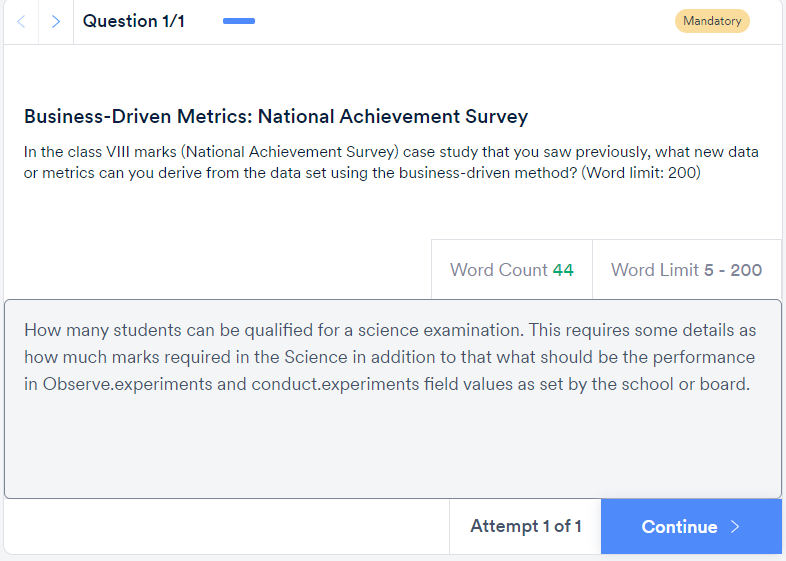

Derived Variable
Description
The given dataset 'cust_rating' has 3 columns i.e 'rating', ' food_rating', 'service_rating'. Create a new variable 'avg_rating'.

In [365]:
import pandas as pd
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')

cust_rating['avg_rating'] = round((cust_rating['rating'] + cust_rating['food_rating'] + cust_rating['service_rating'] )/3)

print(cust_rating.head(10))

  userID  placeID  rating  food_rating  service_rating  avg_rating
0  U1077   135085       2            2               2         2.0
1  U1077   135038       2            2               1         2.0
2  U1077   132825       2            2               2         2.0
3  U1077   135060       1            2               2         2.0
4  U1068   135104       1            1               2         1.0
5  U1068   132740       0            0               0         0.0
6  U1068   132663       1            1               1         1.0
7  U1068   132732       0            0               0         0.0
8  U1068   132630       1            1               1         1.0
9  U1067   132584       2            2               2         2.0


## Practice Questions

In [374]:
odi = pd.read_csv('odi-batting.csv')
odi.head()

Country            Player  Runs   MatchDate Weekday  \
0  Afghanistan  Mohammad Shahzad   118  16-02-2010     Tue   
1  Afghanistan  Mohammad Shahzad   110  01-09-2009     Tue   
2  Afghanistan  Mohammad Shahzad   100  16-08-2010     Mon   
3  Afghanistan  Mohammad Shahzad    82  10-07-2010     Sat   
4  Afghanistan  Mohammad Shahzad    57  01-07-2010     Thu   

                  Ground       Versus  Balls  
0     Sharjah CA Stadium       Canada    121  
1             VRA Ground  Netherlands    111  
2  Cambusdoon New Ground     Scotland     72  
3            Hazelaarweg  Netherlands    108  
4    Sportpark Westvliet       Canada     57

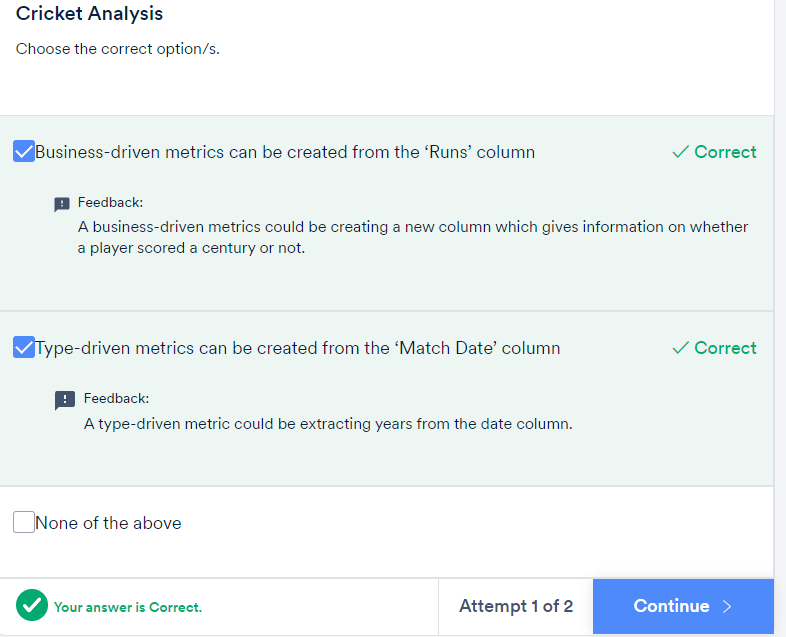

In [387]:
# odi['Player'].value_counts()
no_of_centuries = odi[ (odi['Player'] == 'Sachin R Tendulkar') & (odi['Runs'] >= 100)]
print(len(no_of_centuries))

no_of_centuries = odi[ (odi['Player'] == 'Ricky T Ponting') & (odi['Runs'] >= 100)]
print(len(no_of_centuries))



## Approach shopuld be taken ####

## Create a new column which contains 1 if the player scores more than 100 runs and 0 otherwise. 
## Once you create the new column, sum up all the 1s grouped by the player name. 

odi['century'] = odi['Runs'].apply(lambda x: 1 if x>=100 else 0)

groupby_players = odi.groupby(by='Player').sum()
groupby_players.sort_values('century', ascending=False).head(10)


48
30


Runs  Balls  century
Player                                    
Sachin R Tendulkar   18111  20894       48
Ricky T Ponting      13686  16947       30
Sanath T Jayasuriya  13430  14639       28
Sourav C Ganguly     11363  15350       22
Herschelle H Gibbs    8094   9645       21
Saeed Anwar           8824  10880       20
Christopher H Gayle   8087   9543       19
Brian C Lara         10405  13046       19
Mark E Waugh          8500  11008       18
Desmond L Haynes      8648  13672       17

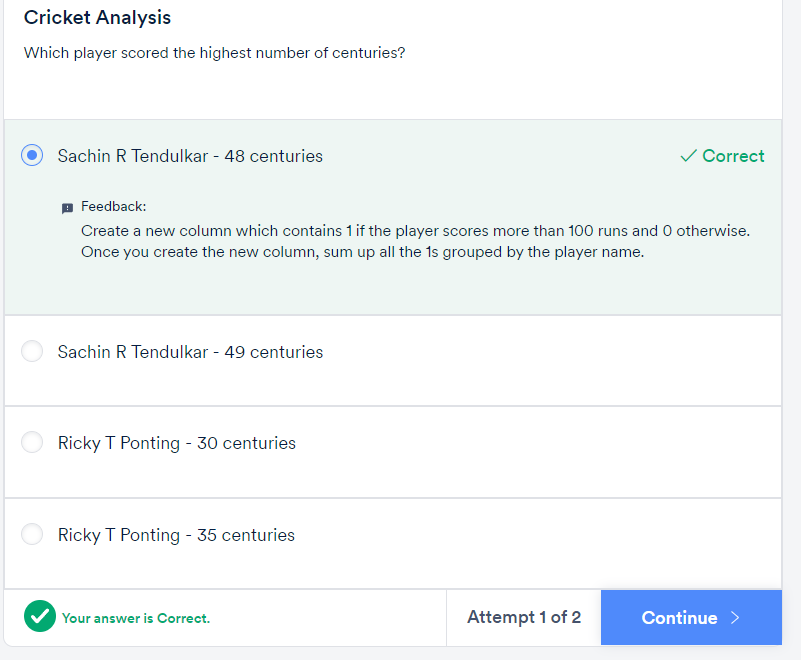

Cricket Analysis
The ‘strike rate’ of a batsman is defined as the (number of runs scored / number of 100 balls faced). It is a measure of ‘how fast a batsman has played’.For example, if a batsman scores 40 runs in 50 balls, the strike rate is 80 runs/100 balls.

Among all the innings where a century was scored by a batsman, which one has the highest strike rate?

In [391]:
odi['strike rate'] = odi['Runs']/odi['Balls']

century_players = odi[ (odi['century'] == 1) ]
century_players.sort_values('strike rate', ascending=False)

Country                     Player  Runs   MatchDate Weekday  \
28157      Pakistan              Shahid Afridi   102  04-10-1996     Fri   
28158      Pakistan              Shahid Afridi   102  15-04-2005     Fri   
34446  South Africa             Mark V Boucher   147  20-09-2006     Wed   
28153      Pakistan              Shahid Afridi   124  21-06-2010     Mon   
36753     Sri Lanka        Sanath T Jayasuriya   134  02-04-1996     Tue   
...             ...                        ...   ...         ...     ...   
28851      Pakistan                 Ramiz Raja   102  23-02-1992     Sun   
24821   New Zealand             Glenn M Turner   114  14-06-1975     Sat   
43594   West Indies  Cuthbert Gordon Greenidge   103  21-11-1981     Sat   
43591   West Indies  Cuthbert Gordon Greenidge   106  09-06-1979     Sat   
2141      Australia               David C Boon   102  10-12-1991     Tue   

                                     Ground       Versus  Balls  century  \
28157                  Gymkhana Club Ground    Sri Lanka     40        1   
28158                            Green Park        India     46        1   
34446                           Senwes Park     Zimbabwe     68        1   
28153  Rangiri Dambulla International Stad.   Bangladesh     60        1   
36753                 Padang Cricket Ground     Pakistan     65        1   
...                                     ...          ...    ...      ...   
28851              Melbourne Cricket Ground  West Indies    158        1   
24821                          Old Trafford        India    177        1   
43594              Melbourne Cricket Ground     Pakistan    161        1   
43591                             Edgbaston        India    173        1   
2141                         Bellerive Oval        India    168        1   

       strike rate  
28157     2.550000  
28158     2.217391  
34446     2.161765  
28153     2.066667  
36753     2.061538  
...            ...  
28851     0.645570  
24821     0.644068  
43594     0.639752  
43591     0.612717  
2141      0.607143  

[1161 rows x 10 columns]

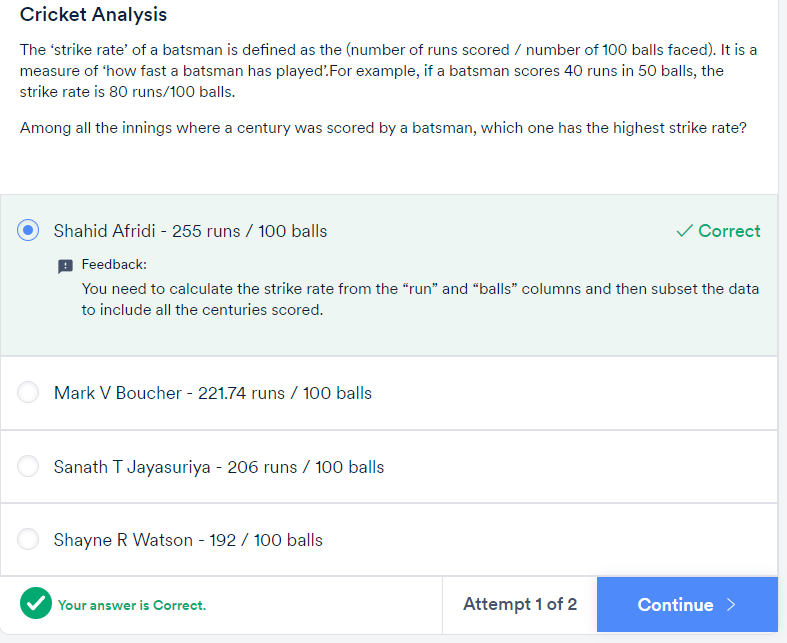

In [406]:

odi['year'] = pd.DatetimeIndex(odi['MatchDate']).year


In [405]:
century_ind_players = odi[ (odi['century'] == 1) & (odi['Country'] == 'India')]
pivot_data = century_ind_players.pivot_table(index='Country', columns='year', aggfunc="sum")
pivot_data['century'].sort_values('India', axis=1, ascending=False)

year     1998  1999  2009  2010  2005  2008  2003  2000  2002  2001  ...  \
Country                                                              ...   
India      18    15    13    12    11    10    10    10     9     9  ...   

year     1987  1984  1990  1993  1991  1989  1986  1995  1992  1983  
Country                                                              
India       4     3     3     2     2     2     2     1     1     1  

[1 rows x 28 columns]

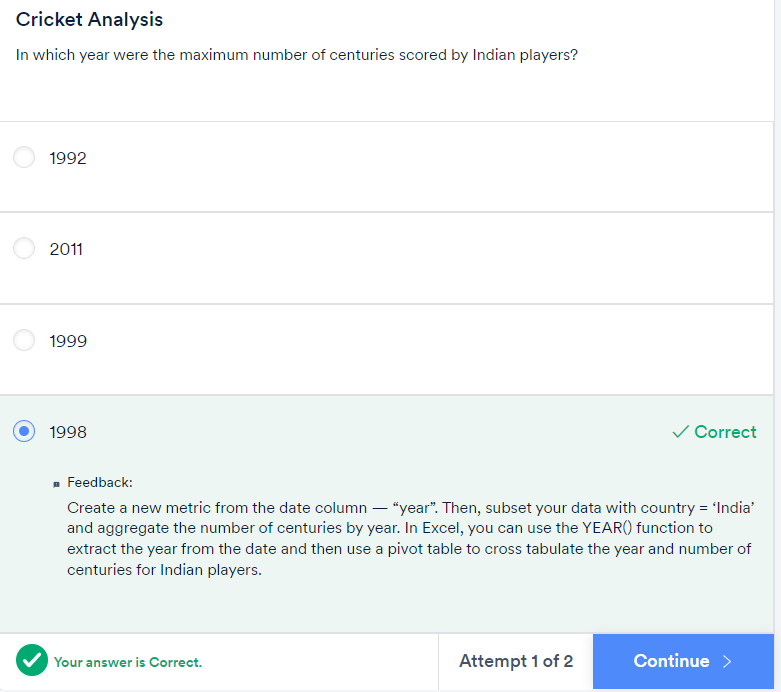

In [408]:
import pandas as pd
order = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/0gjkvLLgNdQLqG10jo5yyJyjK/orders_dimen.csv')
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

order['day'] = pd.DatetimeIndex(order['Order_Date']).day

## order['day'] = order['Order_Date'].apply(lambda x: x.day) ## system solution

print(order.head(10))


   Order_ID Order_Date Order_Priority  Ord_id  day
0         3 2010-10-13            LOW   Ord_1   13
1       293 2012-01-10           HIGH   Ord_2   10
2       483 2011-10-07           HIGH   Ord_3    7
3       515 2010-08-28  NOT SPECIFIED   Ord_4   28
4       613 2011-06-17           HIGH   Ord_5   17
5       643 2011-03-24           HIGH   Ord_6   24
6       678 2010-02-26            LOW   Ord_7   26
7       807 2010-11-23         MEDIUM   Ord_8   23
8       868 2012-08-06  NOT SPECIFIED   Ord_9    6
9       933 2012-04-08  NOT SPECIFIED  Ord_10    8


# Types of Derived Metrics: Data Driven Metrics

In [410]:
nas = pd.read_csv('nas.csv')
nas.head()

STUID        State  District Gender       Age  Category  \
0  26011001001  Maharashtra         1   Girl  13 years       3.0   
1  26011001002  Maharashtra         1   Girl  15 years       3.0   
2  26011001003  Maharashtra         1   Girl  14 years       3.0   
3  26011001004  Maharashtra         1    Boy  13 years       3.0   
4  26011001005  Maharashtra         1   Girl  14 years       3.0   

   Same.language    Siblings Handicap      Father.edu  ...  \
0            2.0   1 sibling       No      Illiterate  ...   
1            2.0  3 siblings       No             NaN  ...   
2            2.0  3 siblings       No  Degree & above  ...   
3            2.0  3 siblings       No       Secondary  ...   
4            2.0  2 siblings       No         Primary  ...   

  Express.science.views     Watch.TV Read.magazine   Read.a.book   Play.games  \
0                 Agree    Every day         Never  Once a month  Once a week   
1                 Agree  Once a week         Never         Never  Once a week   
2                 Agree    Every day  Once a month  Once a month  Once a week   
3                 Agree    Every day     Every day         Never    Every day   
4               Neither        Never         Never  Once a month  Once a week   

  Help.in.household Maths.. Reading.. Science.. Social..  
0         Every day     NaN     33.33       NaN      NaN  
1         Every day     NaN     62.07       NaN      NaN  
2         Every day     NaN     41.38       NaN      NaN  
3         Every day   29.82       NaN       NaN      NaN  
4         Every day     NaN       NaN     27.27      NaN  

[5 rows x 64 columns]

# Graded Questions

In [412]:
grades = pd.read_csv('grades.csv')
grades.head()
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   submission   198 non-null    object
 1   submit_time  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [415]:
grades['submit_time'] = pd.to_datetime(grades['submit_time'])

In [419]:
grades['date'] = pd.DatetimeIndex(grades['submit_time']).date
grades['day'] = pd.DatetimeIndex(grades['submit_time']).day
grades['month'] = pd.DatetimeIndex(grades['submit_time']).month
grades['year'] = pd.DatetimeIndex(grades['submit_time']).year
grades['hour'] = pd.DatetimeIndex(grades['submit_time']).hour
grades['min'] = pd.DatetimeIndex(grades['submit_time']).minute
grades['sec'] = pd.DatetimeIndex(grades['submit_time']).second

grades.head()

submission         submit_time  \
0  https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44... 2017-01-03 20:28:52   
1  https://ckd.upgrad.com/UpGrad/185242ff-7508-4c... 2017-01-03 20:18:21   
2  https://ckd.upgrad.com/UpGrad/a353d129-c100-43... 2017-01-03 22:37:08   
3  https://ckd.upgrad.com/UpGrad/002fc912-faa1-49... 2017-01-02 21:43:19   
4  https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f... 2017-01-03 15:27:49   

         date  day  month  year  hour  min  sec  
0  2017-01-03    3      1  2017    20   28   52  
1  2017-01-03    3      1  2017    20   18   21  
2  2017-01-03    3      1  2017    22   37    8  
3  2017-01-02    2      1  2017    21   43   19  
4  2017-01-03    3      1  2017    15   27   49

In [421]:
grades['filename'] = grades['submission'].apply(lambda x: (x.split('/'))[-1]     )
grades.head()

submission         submit_time  \
0  https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44... 2017-01-03 20:28:52   
1  https://ckd.upgrad.com/UpGrad/185242ff-7508-4c... 2017-01-03 20:18:21   
2  https://ckd.upgrad.com/UpGrad/a353d129-c100-43... 2017-01-03 22:37:08   
3  https://ckd.upgrad.com/UpGrad/002fc912-faa1-49... 2017-01-02 21:43:19   
4  https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f... 2017-01-03 15:27:49   

         date  day  month  year  hour  min  sec        filename  
0  2017-01-03    3      1  2017    20   28   52  DDA1610095.zip  
1  2017-01-03    3      1  2017    20   18   21  DDA1610288.zip  
2  2017-01-03    3      1  2017    22   37    8  DDA1610106.zip  
3  2017-01-02    2      1  2017    21   43   19  DDA1610261.zip  
4  2017-01-03    3      1  2017    15   27   49  DDA1610028.zip

In [422]:
grades['filetype'] = grades['filename'].apply(lambda x: (x.split('.'))[-1]    )
grades.head()

submission         submit_time  \
0  https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44... 2017-01-03 20:28:52   
1  https://ckd.upgrad.com/UpGrad/185242ff-7508-4c... 2017-01-03 20:18:21   
2  https://ckd.upgrad.com/UpGrad/a353d129-c100-43... 2017-01-03 22:37:08   
3  https://ckd.upgrad.com/UpGrad/002fc912-faa1-49... 2017-01-02 21:43:19   
4  https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f... 2017-01-03 15:27:49   

         date  day  month  year  hour  min  sec        filename filetype  
0  2017-01-03    3      1  2017    20   28   52  DDA1610095.zip      zip  
1  2017-01-03    3      1  2017    20   18   21  DDA1610288.zip      zip  
2  2017-01-03    3      1  2017    22   37    8  DDA1610106.zip      zip  
3  2017-01-02    2      1  2017    21   43   19  DDA1610261.zip      zip  
4  2017-01-03    3      1  2017    15   27   49  DDA1610028.zip      zip

In [423]:
grades.groupby(by='filetype').count()

submission  submit_time  date  day  month  year  hour  min  sec  \
filetype                                                                    
7z                 2            2     2    2      2     2     2    2    2   
R                  7            7     7    7      7     7     7    7    7   
zip              189          189   189  189    189   189   189  189  189   

          filename  
filetype            
7z               2  
R                7  
zip            189

In [426]:
grades['filetype'].value_counts()

zip    189
R        7
7z       2
Name: filetype, dtype: int64

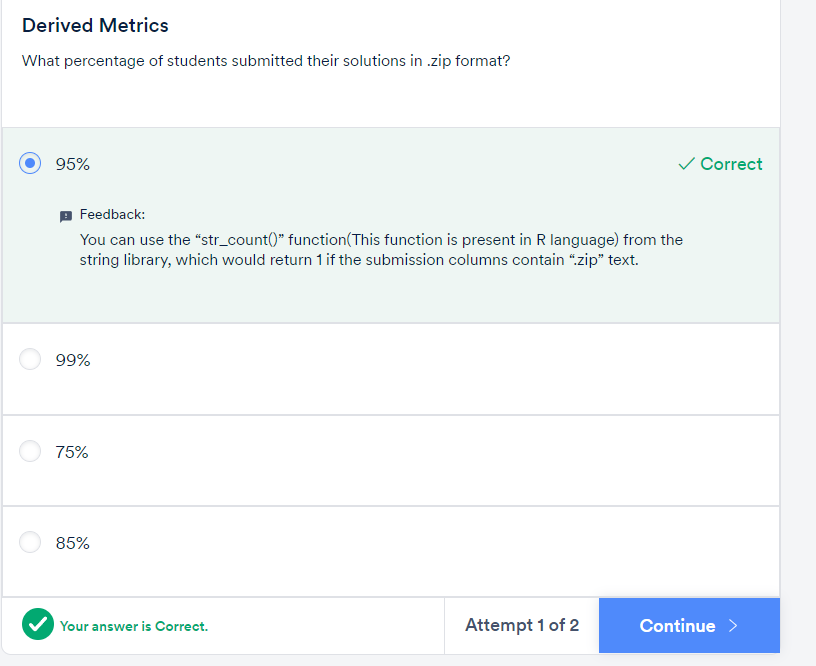

Q. How many students submitted the assignment after the first deadline (including the students who submitted after the second deadline) ?

In [433]:
d1 = grades[ grades['submit_time'] > '2017-01-03 23:59:59']
d1.shape

(44, 11)

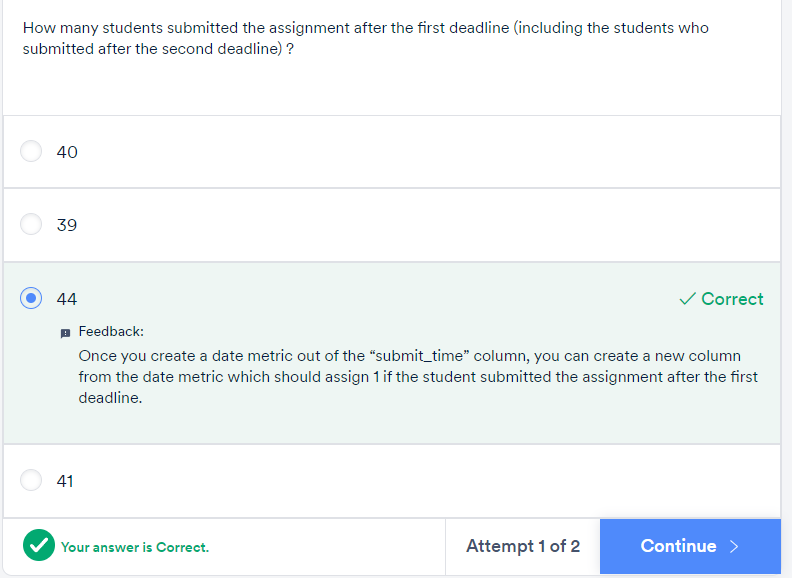

On which date did the most students submit the assignment?

In [438]:
data_group = grades.groupby(by='date').count()
data_group.submission

data_group.sort_values('submission', ascending=False)

submission  submit_time  day  month  year  hour  min  sec  \
date                                                                    
2017-01-03         120          120  120    120   120   120  120  120   
2017-01-09          21           21   21     21    21    21   21   21   
2017-01-02          14           14   14     14    14    14   14   14   
2017-01-04          12           12   12     12    12    12   12   12   
2016-12-30           6            6    6      6     6     6    6    6   
2017-01-01           6            6    6      6     6     6    6    6   
2017-01-10           3            3    3      3     3     3    3    3   
2017-01-08           3            3    3      3     3     3    3    3   
2017-01-07           2            2    2      2     2     2    2    2   
2016-12-28           2            2    2      2     2     2    2    2   
2016-12-29           2            2    2      2     2     2    2    2   
2017-01-17           1            1    1      1     1     1    1    1   
2016-11-19           1            1    1      1     1     1    1    1   
2017-01-06           1            1    1      1     1     1    1    1   
2016-12-19           1            1    1      1     1     1    1    1   
2016-12-31           1            1    1      1     1     1    1    1   
2016-12-21           1            1    1      1     1     1    1    1   
2017-02-03           1            1    1      1     1     1    1    1   

            filename  filetype  
date                            
2017-01-03       120       120  
2017-01-09        21        21  
2017-01-02        14        14  
2017-01-04        12        12  
2016-12-30         6         6  
2017-01-01         6         6  
2017-01-10         3         3  
2017-01-08         3         3  
2017-01-07         2         2  
2016-12-28         2         2  
2016-12-29         2         2  
2017-01-17         1         1  
2016-11-19         1         1  
2017-01-06         1         1  
2016-12-19         1         1  
2016-12-31         1         1  
2016-12-21         1         1  
2017-02-03         1         1

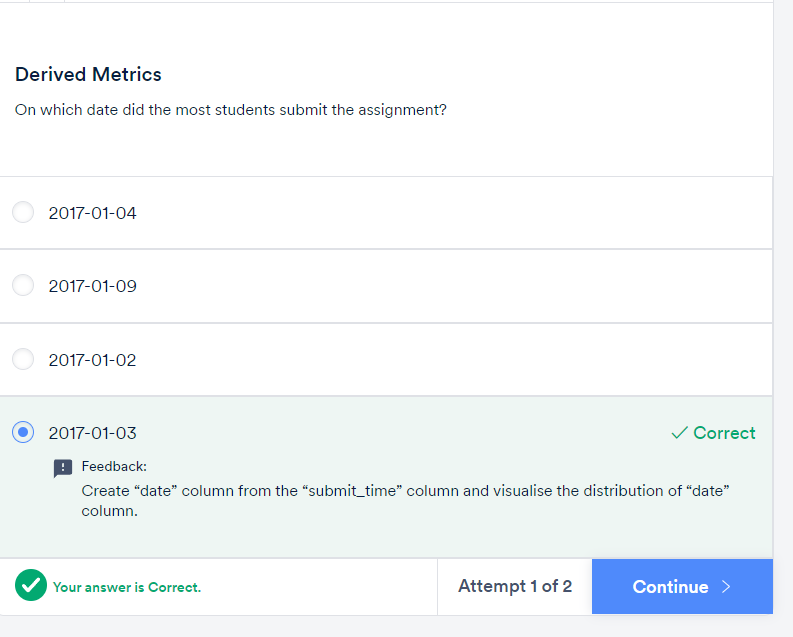

In [439]:
data_group_hr = grades.groupby(by='hour').count()

data_group_hr.sort_values('submission', ascending=False)

submission  submit_time  date  day  month  year  min  sec  filename  \
hour                                                                        
23            66           66    66   66     66    66   66   66        66   
21            27           27    27   27     27    27   27   27        27   
22            24           24    24   24     24    24   24   24        24   
20            16           16    16   16     16    16   16   16        16   
0             10           10    10   10     10    10   10   10        10   
1              8            8     8    8      8     8    8    8         8   
13             6            6     6    6      6     6    6    6         6   
18             6            6     6    6      6     6    6    6         6   
14             6            6     6    6      6     6    6    6         6   
17             4            4     4    4      4     4    4    4         4   
15             4            4     4    4      4     4    4    4         4   
12             3            3     3    3      3     3    3    3         3   
10             3            3     3    3      3     3    3    3         3   
3              3            3     3    3      3     3    3    3         3   
16             2            2     2    2      2     2    2    2         2   
19             2            2     2    2      2     2    2    2         2   
4              2            2     2    2      2     2    2    2         2   
2              2            2     2    2      2     2    2    2         2   
11             1            1     1    1      1     1    1    1         1   
8              1            1     1    1      1     1    1    1         1   
9              1            1     1    1      1     1    1    1         1   
6              1            1     1    1      1     1    1    1         1   

      filetype  
hour            
23          66  
21          27  
22          24  
20          16  
0           10  
1            8  
13           6  
18           6  
14           6  
17           4  
15           4  
12           3  
10           3  
3            3  
16           2  
19           2  
4            2  
2            2  
11           1  
8            1  
9            1  
6            1

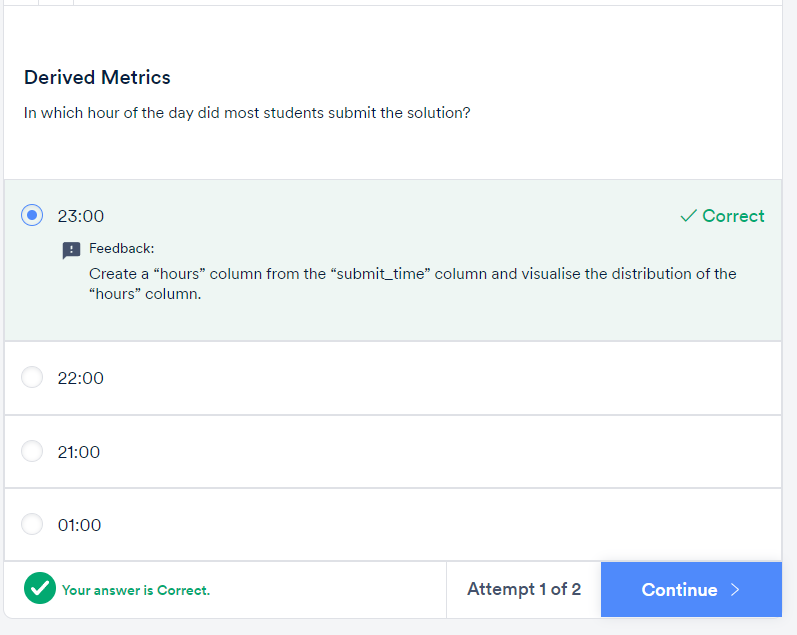

<AxesSubplot: xlabel='hour', ylabel='Density'>

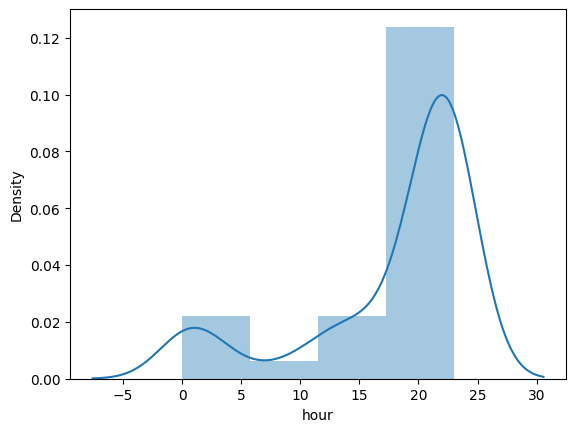

In [442]:
sns.distplot(grades['hour'],bins=4)

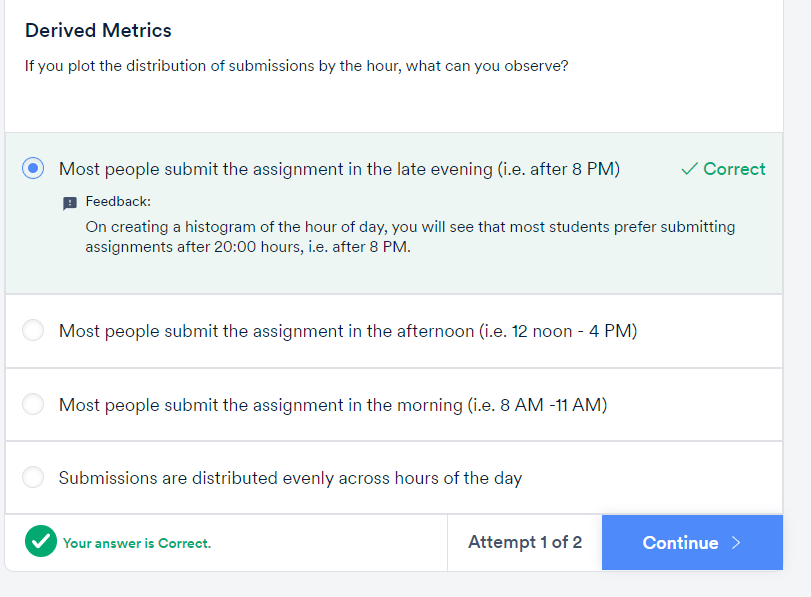

(array([ 20.,   5.,   1.,   2.,   4.,   9.,  12.,  10.,  18., 117.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

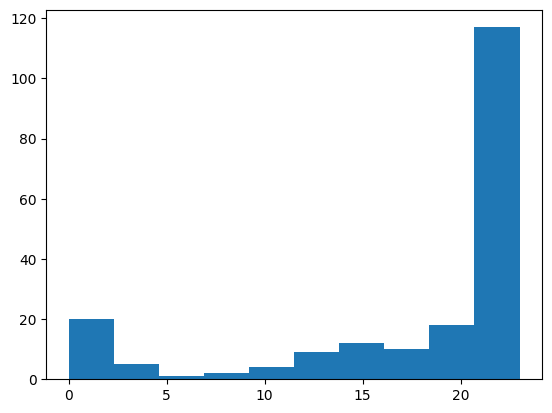

In [443]:
plt.hist(grades['hour'])